
#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2024**

---
## Trabajo práctico entregable - Parte 1

In [113]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn 


seaborn.set_context('talk')
seaborn.set_theme(style='ticks')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
pd.options.display.max_columns=None
df = pd.read_csv(url)

In [3]:
df.head()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment,salary_percentage_inflation_adjustment,¿En qué mes fue el último ajuste?,salary_comparison_last_semester,¿Contás con beneficios adicionales?,salary_satisfaction,Trabajo de,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,company_employee_number,work_work_modality,Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?,company_recommended,"¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?",¿Salir o seguir contestando?,profile_studies_level,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,Uno,26.0,Abril,2,"Abono de Internet, Clases de idiomas, Crédito ...",2,Infosec,10.0,1.0,1.0,0,"Amazon Web Services, Linux","Bash/Shell, Python",Angular,Ninguna de las anteriores,Ninguna de las anteriores,De 201 a 500 personas,100% remoto,0,5,0,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,Dos,24.0,Mayo,2,Ninguna de las anteriores,3,DevOps Engineer,23.0,2.0,2.0,4,"Docker, Kubernetes, Linux, VMWare, Windows Server","Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...","Angular, Bootstrap, jQuery, Laravel, Node.js","MariaDB, Microsoft SQL Server, MongoDB, MySQL,...","PHPUnit, Postman",De 201 a 500 personas,100% presencial,0,4,1,Responder sobre mis estudios,Maestría,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,No,0.0,No tuve,3,"Abono de Internet, Capacitaciones y/o cursos,",3,Developer,0.0,0.0,0.0,0,Ninguna de las anteriores,"SQL, Oracle APEX, PL-SQL, SQL Developer",Ninguno de los anteriores,Oracle,Ninguna de las anteriores,De 11 a 50 personas,100% remoto,0,10,3,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis
3,Argentina,Chaco,Part-Time,Staff (planta permanente),190000.0,240000.0,NaN,NaN,No,No recibo bono,Dos,11.0,Mayo,1,"Capacitaciones y/o cursos, Descuento en gimnas...",2,Business Analyst,2.0,2.0,0.0,0,"Azure, SAP, CRM",ABAP,Ninguno de los anteriores,"Microsoft Azure (Tables, CosmosDB, SQL, etc)",Ninguna de las anteriores,De 501 a 1000 personas,Híbrido (presencial y remoto),1,7,3,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Mujer Cis
4,Argentina,Chaco,Full-Time,Tercerizado (trabajo a través de consultora o ...,250000.0,207000.0,NaN,NaN,No,No recibo bono,Dos,60.0,Mayo,1,Ninguna de las anteriores,1,QA / Tester,3.0,0.0,0.0,1,"Docker, Linux",Java,Lippia,Ninguna de las anteriores,"Appium, Cucumber, Lippia, Selenium",De 51 a 100 personas,100% remoto,0,7,2,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5805 entries, 0 to 5804
Data columns (total 43 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   work_country                                                                          5805 non-null   object 
 1   work_province                                                                         5805 non-null   object 
 2   work_dedication                                                                       5805 non-null   object 
 3   work_contract_type                                                                    5805 non-null   object 
 4   salary_monthly_BRUTO                                                                  5805 non-null   float64
 5   salary_monthly_NETO                                                                

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 100000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

# RESPUESTAS AL EJERCICIO 1:

## *1.   Seleccionar las columnas relevantes para analizar.*

Analizamos el dataframe que cargamos "df"

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5805 entries, 0 to 5804
Data columns (total 43 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   work_country                                                                          5805 non-null   object 
 1   work_province                                                                         5805 non-null   object 
 2   work_dedication                                                                       5805 non-null   object 
 3   work_contract_type                                                                    5805 non-null   object 
 4   salary_monthly_BRUTO                                                                  5805 non-null   float64
 5   salary_monthly_NETO                                                                

In [6]:
df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       '¿En qué mes fue el último ajuste?', 'salary_comparison_last_semester',
       '¿Contás con beneficios adicionales?', 'salary_satisfaction',
       'Trabajo de', 'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'tools_platform', 'tools_programming_languages', 'tools_frameworks',
       'tools_data_bases', 'tools_qa_testing', 'company_employee_number',
       'work_work_modality',
       'Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended',
       '¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?

De las 5805 encuestas se vé que para salary_monthly_NETO respondieron 5566 y para salary_monthly_BRUTO respondieron todos. De acuerdo a esto vamos a incluir el sueldo BRUTO en el analisis. Por lo que las columnas relevantes son:
1. 'tools_programming_languages'
2. 'salary_monthly_NETO'
3. 'salary_monthly_BRUTO'
4. 'work_contract_type'
5. 'work_work_modality'
6. 'salary_in_usd'


In [7]:
lenguajes = 'tools_programming_languages'
neto = 'salary_monthly_NETO'
bruto = 'salary_monthly_BRUTO'
contrato = 'work_contract_type'
modalidad = 'work_work_modality'
dolares = 'salary_in_usd'

# Selección de Columnas Relevantes.
relevant_columns = [lenguajes, neto, bruto, contrato, modalidad, dolares]

df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       '¿En qué mes fue el último ajuste?', 'salary_comparison_last_semester',
       '¿Contás con beneficios adicionales?', 'salary_satisfaction',
       'Trabajo de', 'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'tools_platform', 'tools_programming_languages', 'tools_frameworks',
       'tools_data_bases', 'tools_qa_testing', 'company_employee_number',
       'work_work_modality',
       'Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended',
       '¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?

Vamos a visualizar los graficos relacionados al salario en BRUTO

C:\Users\josez\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


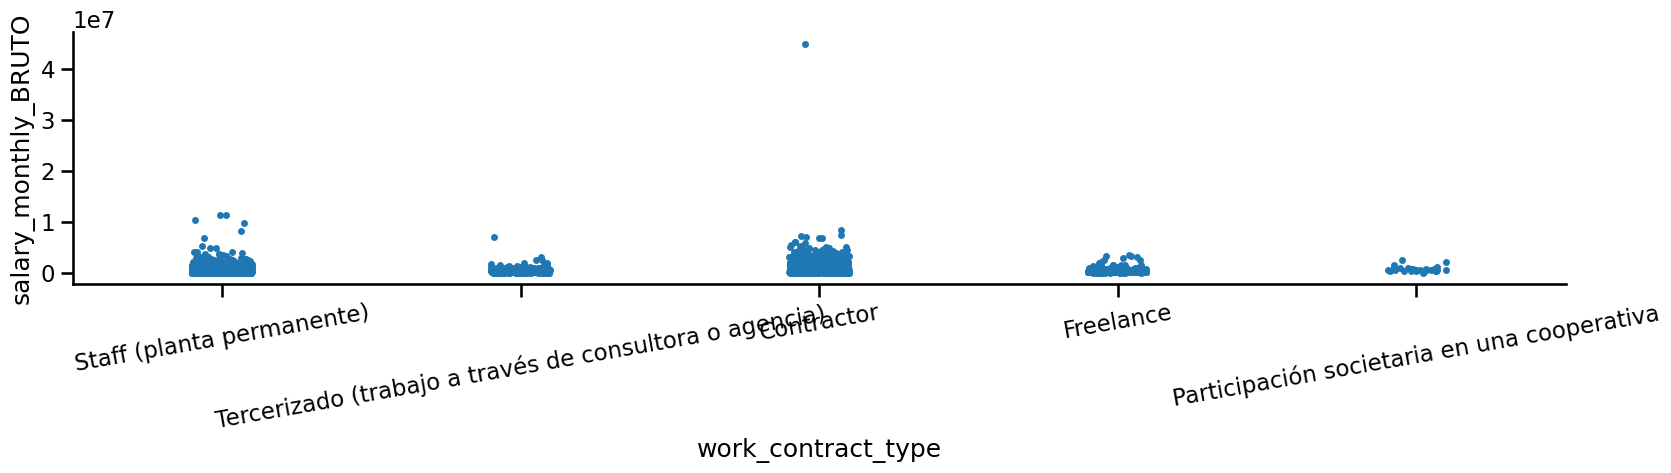

In [8]:
# Gráfico donde se ve que existe una diferencia de salarios en función del tipo de contrato.
seaborn.catplot(data=df, x=contrato, y=bruto, aspect=4, height=4)
plt.xticks(rotation=10);

## *2. Seleccionar las filas relevantes para analizar. Esto incluye:*

*   *la eliminación de valores extremos y erróneos,*
*   *pero también puede enfocar el análisis en una sub-población. Por ejemplo,se pueden limitar a personas con un salario mayor que 100000 pesos, o a las personas que trabajan sólo en "Data Science"* 

***Pero deben justificar su elección y reformular la pregunta inicial de ser necesario.***

*   *Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.*
*   *Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.*

Para la elección de las filas relevantes vamos a analizar como se componen los datos de la encuesta para la respuesta de salario BRUTO

C:\Users\josez\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


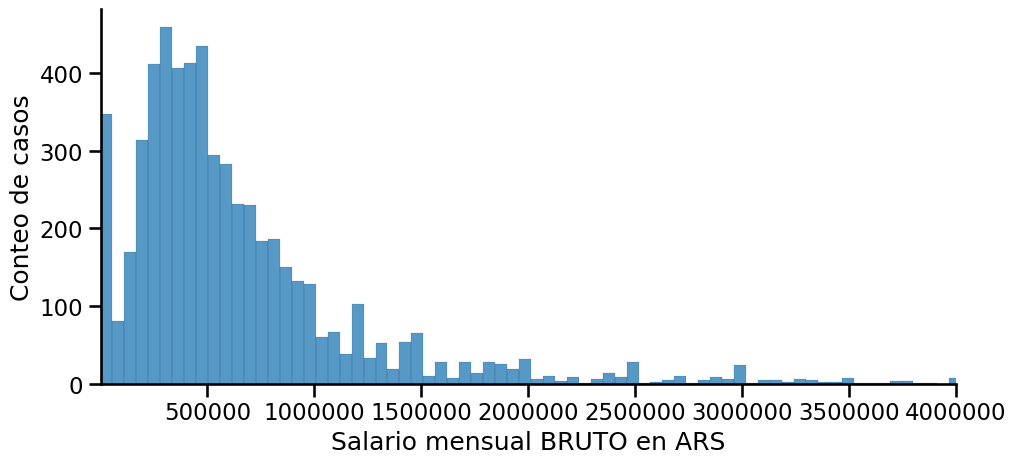

In [9]:
graf = seaborn.displot(df[bruto], aspect=2)
plt.ticklabel_format(style='plain', axis='x')
graf.set(xlim=(2, 4000000))
graf.set(xlabel="Salario mensual BRUTO en ARS", ylabel="Conteo de casos")

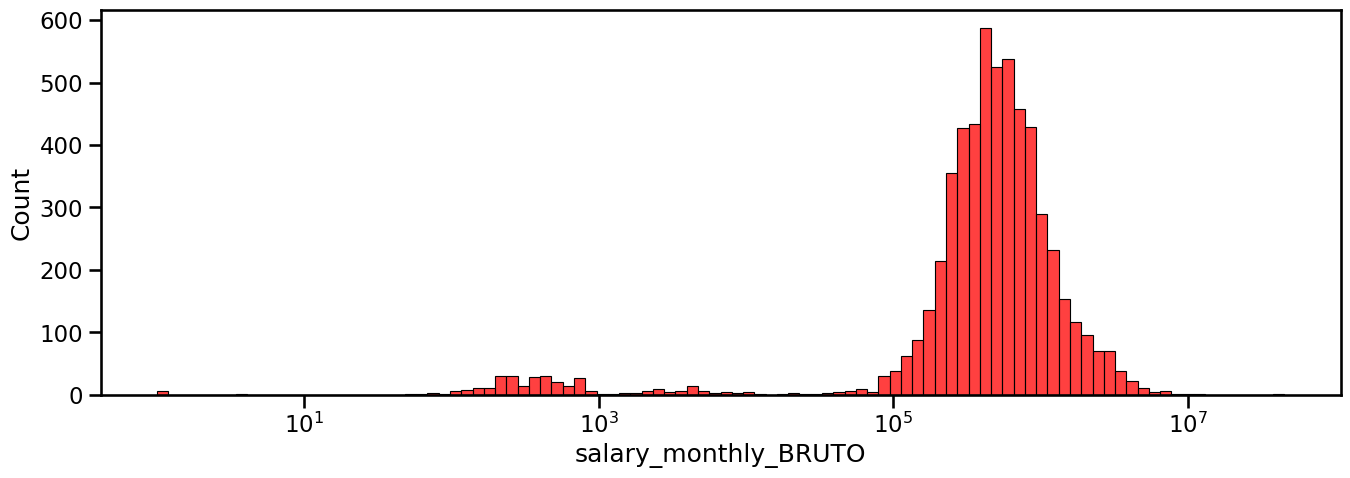

In [10]:
# Gráfico en escala logarítmica, donde se ven los valores (salarios) erróneos menores a 10000.
fig= plt.subplots(figsize=(16, 5))
seaborn.histplot(df[bruto], bins=100, color='red', log_scale=True);

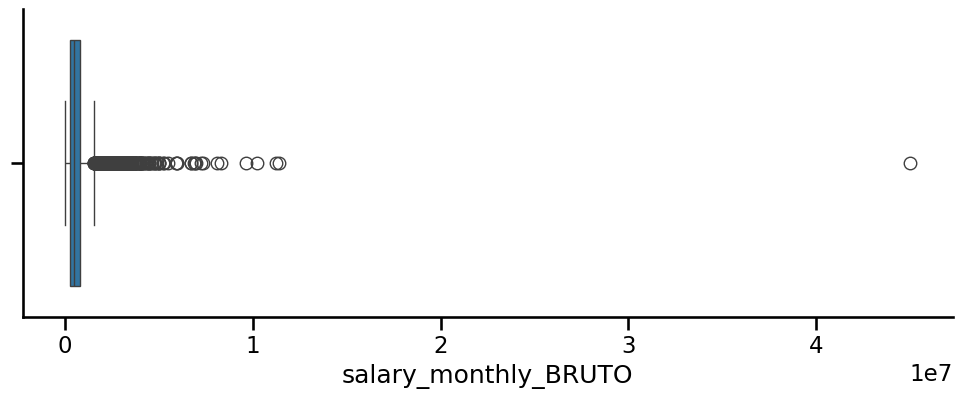

In [11]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[bruto])
seaborn.despine()

En el grafico podemos ver que hay valores cercanos a "0" que seguramente fueron cargados erroneamente

Vamos a utilizar el método describe() de un DataFrame de Pandas te proporciona un resumen estadístico descriptivo de las variables salario BRUTO y NETO

In [12]:
print(df[[neto, bruto]].describe())

       salary_monthly_NETO  salary_monthly_BRUTO
count         5.566000e+03          5.805000e+03
mean          5.671732e+05          6.941626e+05
std           9.586431e+05          9.526238e+05
min           1.000000e+00          1.000000e+00
25%           2.500000e+05          2.971450e+05
50%           4.007285e+05          4.930000e+05
75%           6.000000e+05          8.000000e+05
max           4.500000e+07          4.500000e+07


Funcion "info_salarios" a la cual llamaremos pasandole el dataframe y realiza un analisis de los extremos del salario BRUTO:
1. Eliminamos los valores de salario BRUTO inferior a 30K
2. Eliminamos los valores de salario BRUTO superior al 99%

In [13]:
def info_salarios(df, salario):

    # ¿Cuántos NaN existen en la columna de salarios?
    print(f'Cantidad de salarios nulos: {df[salario].isna().sum()}')

    # Salario Mínimo para la subpoblación de estudio.
    min_salary = 30000
    # ¿Cuántos salarios erróneos existen en la columna de salarios?
    print(f'Cantidad de salarios <= 30K: {(df[salario] <= min_salary).sum()}')
    # Considerando el salario mínimo.
    df = df[df[salario] > min_salary]

    # Salario Máximo para la subpoblación de estudio (Percentil 99).
    max_salary = df[salario].quantile(0.99)
    print(f'Percentil 99: {max_salary}')

    # ¿Cuántos salarios son anómalos en la columna de salarios?
    print(f'Cantidad de salarios >= percentil 99: {(df[salario] >= max_salary).sum()}')
    # Considerando el salario del percentil 99.
    df = df[df[salario] < max_salary]

    return df

Llamamos la funcion "info_salarios" y la misma me devuelve un dataframe recortado en los extremos. Mostrando tambien un resumen estadistico de la columna salario BRUTO

In [14]:
print('Filtrado según salario BRUTO:')
df = info_salarios(df, bruto)
print('----------')

# Datos Muestrales (sobre el salario NETO y el salario BRUTO).
print(df[[neto, bruto]].describe())

Filtrado según salario BRUTO:
Cantidad de salarios nulos: 0
Cantidad de salarios <= 30K: 332
Percentil 99: 3735599.999999995
Cantidad de salarios >= percentil 99: 55
----------
       salary_monthly_NETO  salary_monthly_BRUTO
count         5.212000e+03          5.418000e+03
mean          5.585191e+05          6.816103e+05
std           6.695254e+05          5.694859e+05
min           1.390000e+02          3.200000e+04
25%           2.750000e+05          3.200000e+05
50%           4.150000e+05          5.050000e+05
75%           6.000000e+05          8.160000e+05
max           2.229600e+07          3.730000e+06


Volvemos a graficar

C:\Users\josez\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


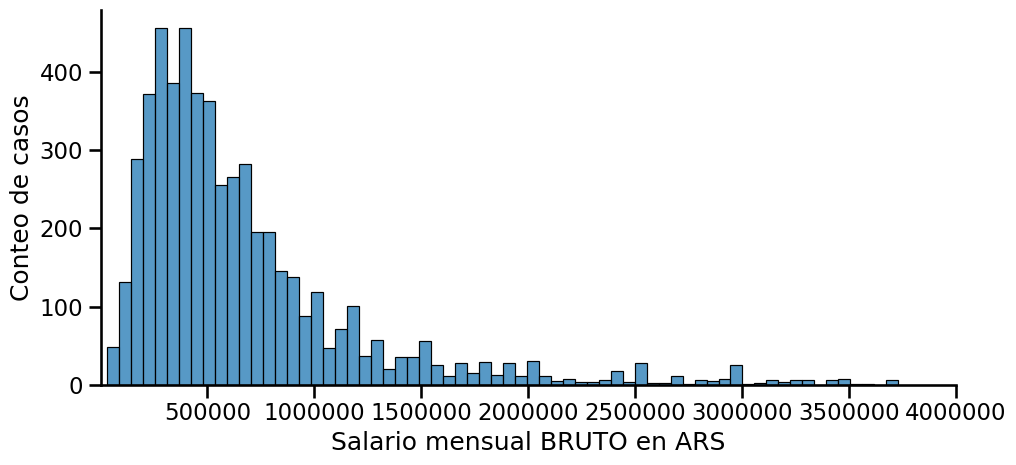

In [15]:
graf = seaborn.displot(df[bruto], aspect=2)
plt.ticklabel_format(style='plain', axis='x')
graf.set(xlim=(2, 4000000))
graf.set(xlabel="Salario mensual BRUTO en ARS", ylabel="Conteo de casos")

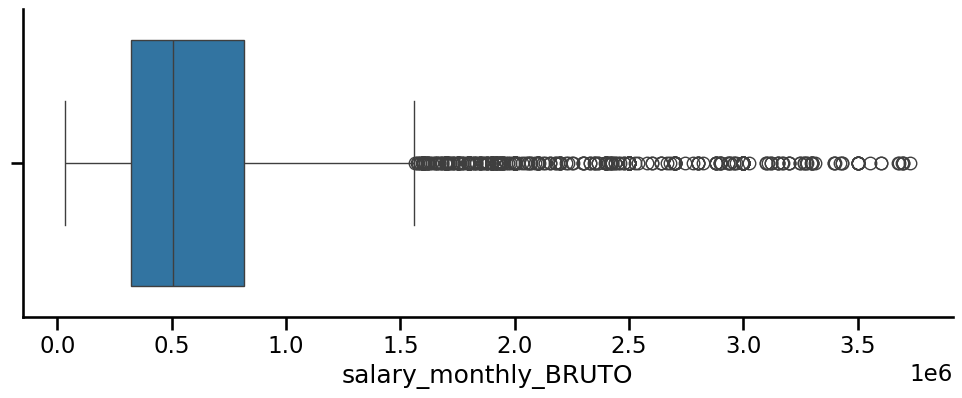

In [16]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[bruto])
seaborn.despine()

### Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [17]:
df.tools_programming_languages[:10]

0                                   Bash/Shell, Python
1    Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...
2              SQL, Oracle APEX, PL-SQL, SQL Developer
3                                                 ABAP
4                                                 Java
5                                          Python, SQL
6                    CSS, HTML, Javascript, TypeScript
7                                                  SQL
8                    Bash/Shell, HTML, Javascript, PHP
9                                HTML, Javascript, PHP
Name: tools_programming_languages, dtype: object

In [18]:
df.tools_programming_languages.info()

<class 'pandas.core.series.Series'>
Index: 5418 entries, 0 to 5804
Series name: tools_programming_languages
Non-Null Count  Dtype 
--------------  ----- 
5416 non-null   object
dtypes: object(1)
memory usage: 84.7+ KB


Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [19]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:4]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_contract_type,work_work_modality,salary_in_usd,cured_programming_languages
0,bash/shell,"Bash/Shell, Python",520000.0,680000.0,Staff (planta permanente),100% remoto,NaN,"[bash/shell, python]"
0,python,"Bash/Shell, Python",520000.0,680000.0,Staff (planta permanente),100% remoto,NaN,"[bash/shell, python]"
1,bash/shell,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,650000.0,Staff (planta permanente),100% presencial,NaN,"[bash/shell, css, html, javascript, php, sql, ..."
1,css,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,650000.0,Staff (planta permanente),100% presencial,NaN,"[bash/shell, css, html, javascript, php, sql, ..."


In [20]:
df_lang.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15263 entries, 0 to 5804
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   programming_language         15263 non-null  object 
 1   tools_programming_languages  15263 non-null  object 
 2   salary_monthly_NETO          14703 non-null  float64
 3   salary_monthly_BRUTO         15263 non-null  float64
 4   work_contract_type           15263 non-null  object 
 5   work_work_modality           15263 non-null  object 
 6   salary_in_usd                5136 non-null   object 
 7   cured_programming_languages  15263 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

### Para responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?** Deberíamos responder primero **¿Cuáles son los mejores salarios?** Por lo tanto primero voy a ver los valores y forma que tienen los datos en las columna 'salary_monthly_BRUTO'

In [21]:
df[bruto].describe().apply(lambda s: '{0:.2f}'.format(s))

count       5418.00
mean      681610.27
std       569485.90
min        32000.00
25%       320000.00
50%       505000.00
75%       816000.00
max      3730000.00
Name: salary_monthly_BRUTO, dtype: object

C:\Users\josez\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


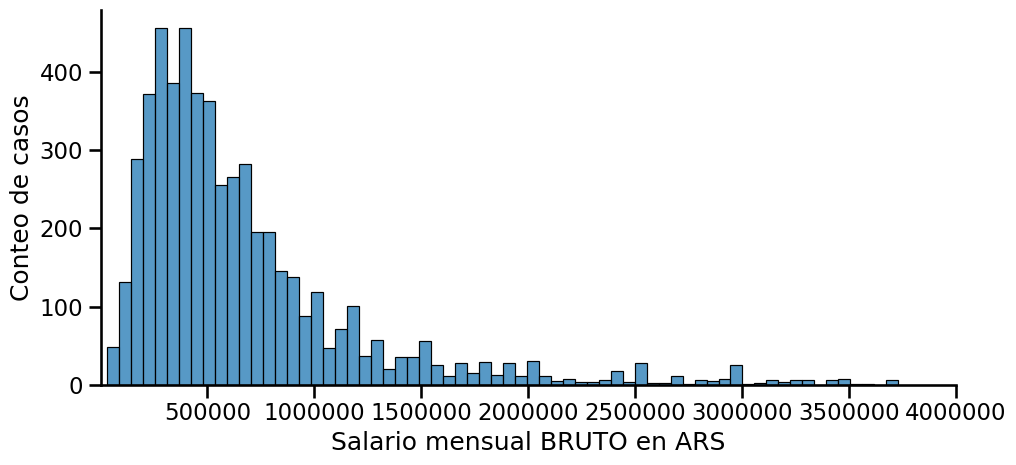

In [22]:
graf = seaborn.displot(df[bruto], aspect=2)
plt.ticklabel_format(style='plain', axis='x')
graf.set(xlim=(2, 4000000))
graf.set(xlabel="Salario mensual BRUTO en ARS", ylabel="Conteo de casos")

C:\Users\josez\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


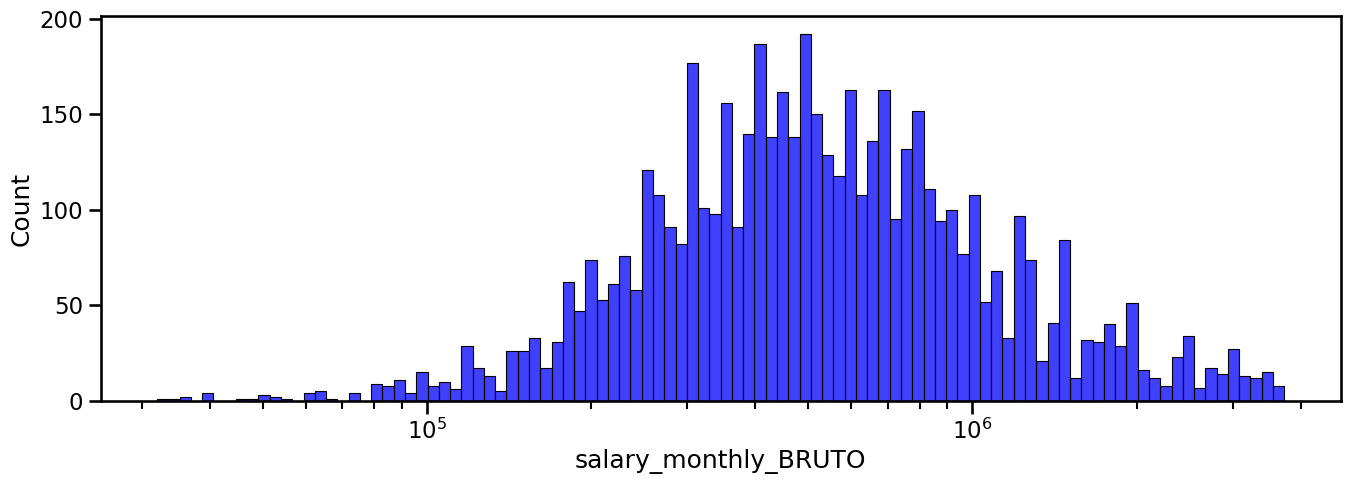

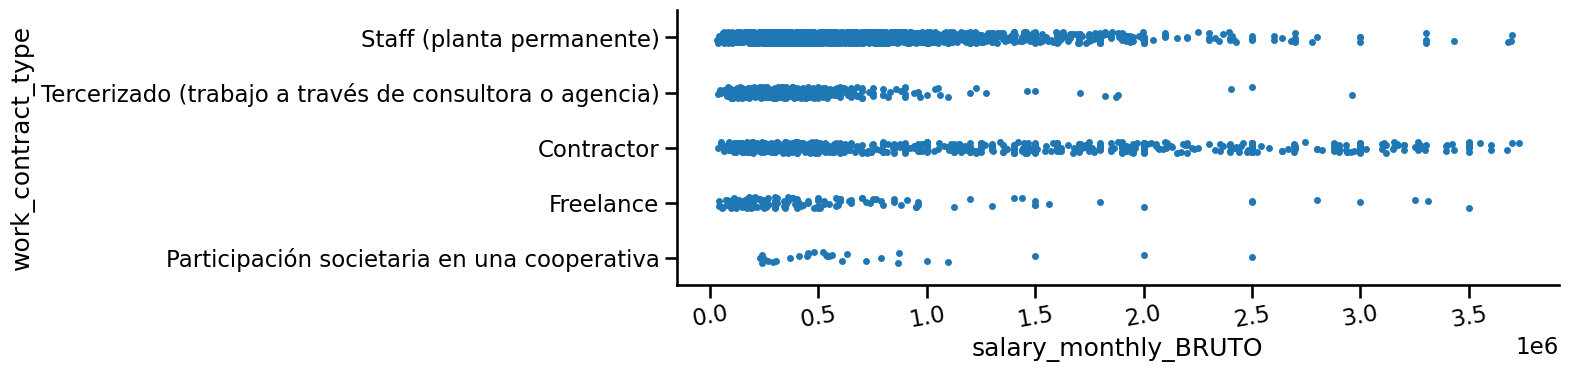

In [23]:
# Gráfico en escala logarítmica, donde se ven los valores (salarios) erróneos menores a 10000.
fig= plt.subplots(figsize=(16, 5))
seaborn.histplot(df[bruto], bins=100, color='blue', log_scale=True);

# Gráfico donde se ve que existe una diferencia de salarios en función del tipo de contrato.
# Podría ser interesante estudiarlo, o tomar una subpoblación (por ejemplo, Full-Time).
seaborn.catplot(data=df, x= bruto, y= contrato, aspect=4, height=4)
plt.xticks(rotation=10);

Para la variable "salary_monthly_BRUTO", correspondiente al eje "Salario mensual BRUTO en ARS" Se observa que:

* El rango de valores tomados por la columna va desde 0 hasta aproximadamente ARS 4.000.000.
* La mayoría de los valores se condensa por debajo de los ARS 1.000.000, y pocos superan los ARS 3.000.000
* Los valores más frencuentes aparentan estar cerca de los ARS 500.000


Sobre el dataframe "df_lang", vamos a contar la cantidad de veces que cada lenguaje de programacion se repite.

In [24]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:40]

,frequency,count
0,sql,2357
1,javascript,2127
2,html,1522
3,python,1520
4,java,1022
5,css,1018
6,typescript,983
7,bash/shell,837
8,.net,650
9,php,624


Vamos a realizar el analisis con los 34 lenguajes de programacion mas utilizados. Es este punto tomamos 31 para tratar de abarcar el mayor universo de tecnologias y sus respectivos desarrolladores.

In [25]:
interesting_languages = language_count['frequency'].head(31).to_list()
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:20]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_contract_type,work_work_modality,salary_in_usd,cured_programming_languages
0,bash/shell,"Bash/Shell, Python",520000.0,680000.0,Staff (planta permanente),100% remoto,NaN,"[bash/shell, python]"
0,python,"Bash/Shell, Python",520000.0,680000.0,Staff (planta permanente),100% remoto,NaN,"[bash/shell, python]"
1,bash/shell,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,650000.0,Staff (planta permanente),100% presencial,NaN,"[bash/shell, css, html, javascript, php, sql, ..."
1,css,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,650000.0,Staff (planta permanente),100% presencial,NaN,"[bash/shell, css, html, javascript, php, sql, ..."
1,html,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,650000.0,Staff (planta permanente),100% presencial,NaN,"[bash/shell, css, html, javascript, php, sql, ..."
1,javascript,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,650000.0,Staff (planta permanente),100% presencial,NaN,"[bash/shell, css, html, javascript, php, sql, ..."
1,php,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,650000.0,Staff (planta permanente),100% presencial,NaN,"[bash/shell, css, html, javascript, php, sql, ..."
1,sql,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,650000.0,Staff (planta permanente),100% presencial,NaN,"[bash/shell, css, html, javascript, php, sql, ..."
1,typescript,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,650000.0,Staff (planta permanente),100% presencial,NaN,"[bash/shell, css, html, javascript, php, sql, ..."
1,vba,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.0,650000.0,Staff (planta permanente),100% presencial,NaN,"[bash/shell, css, html, javascript, php, sql, ..."


[]

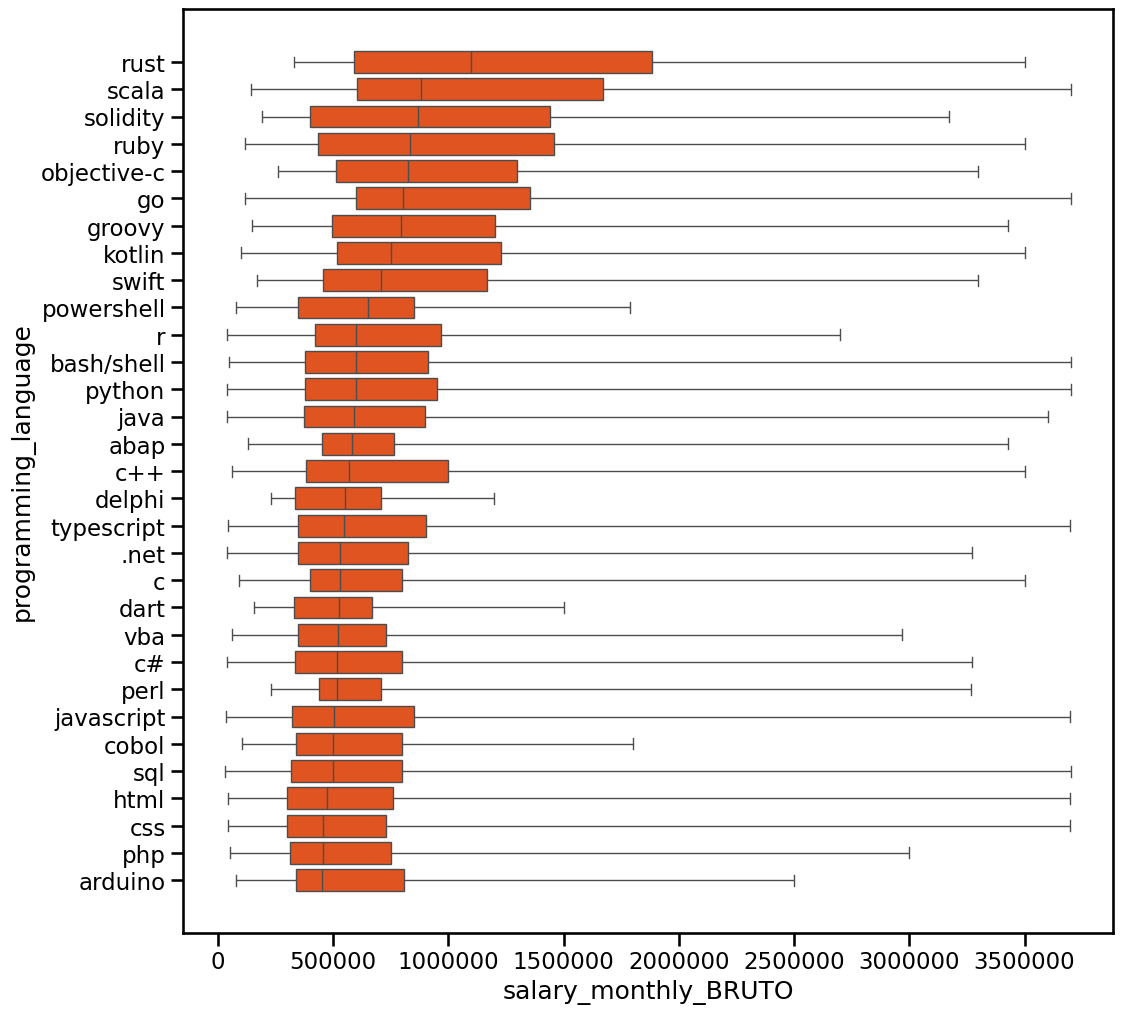

In [26]:
result = filtered_df_lang.groupby('programming_language')[bruto].aggregate(numpy.median).reset_index().sort_values(bruto, ascending=False)

max_salary = filtered_df_lang.salary_monthly_BRUTO.quantile(0.9999)

filtered_df_lang = filtered_df_lang[filtered_df_lang[bruto] < max_salary]

plt.figure(figsize=(12, 12))
seaborn.boxplot(data=filtered_df_lang, x=bruto, y='programming_language',
                color='orangered', order=result['programming_language'], whis=(0, 100))
plt.ticklabel_format(style='plain', axis='x')
plt.plot()

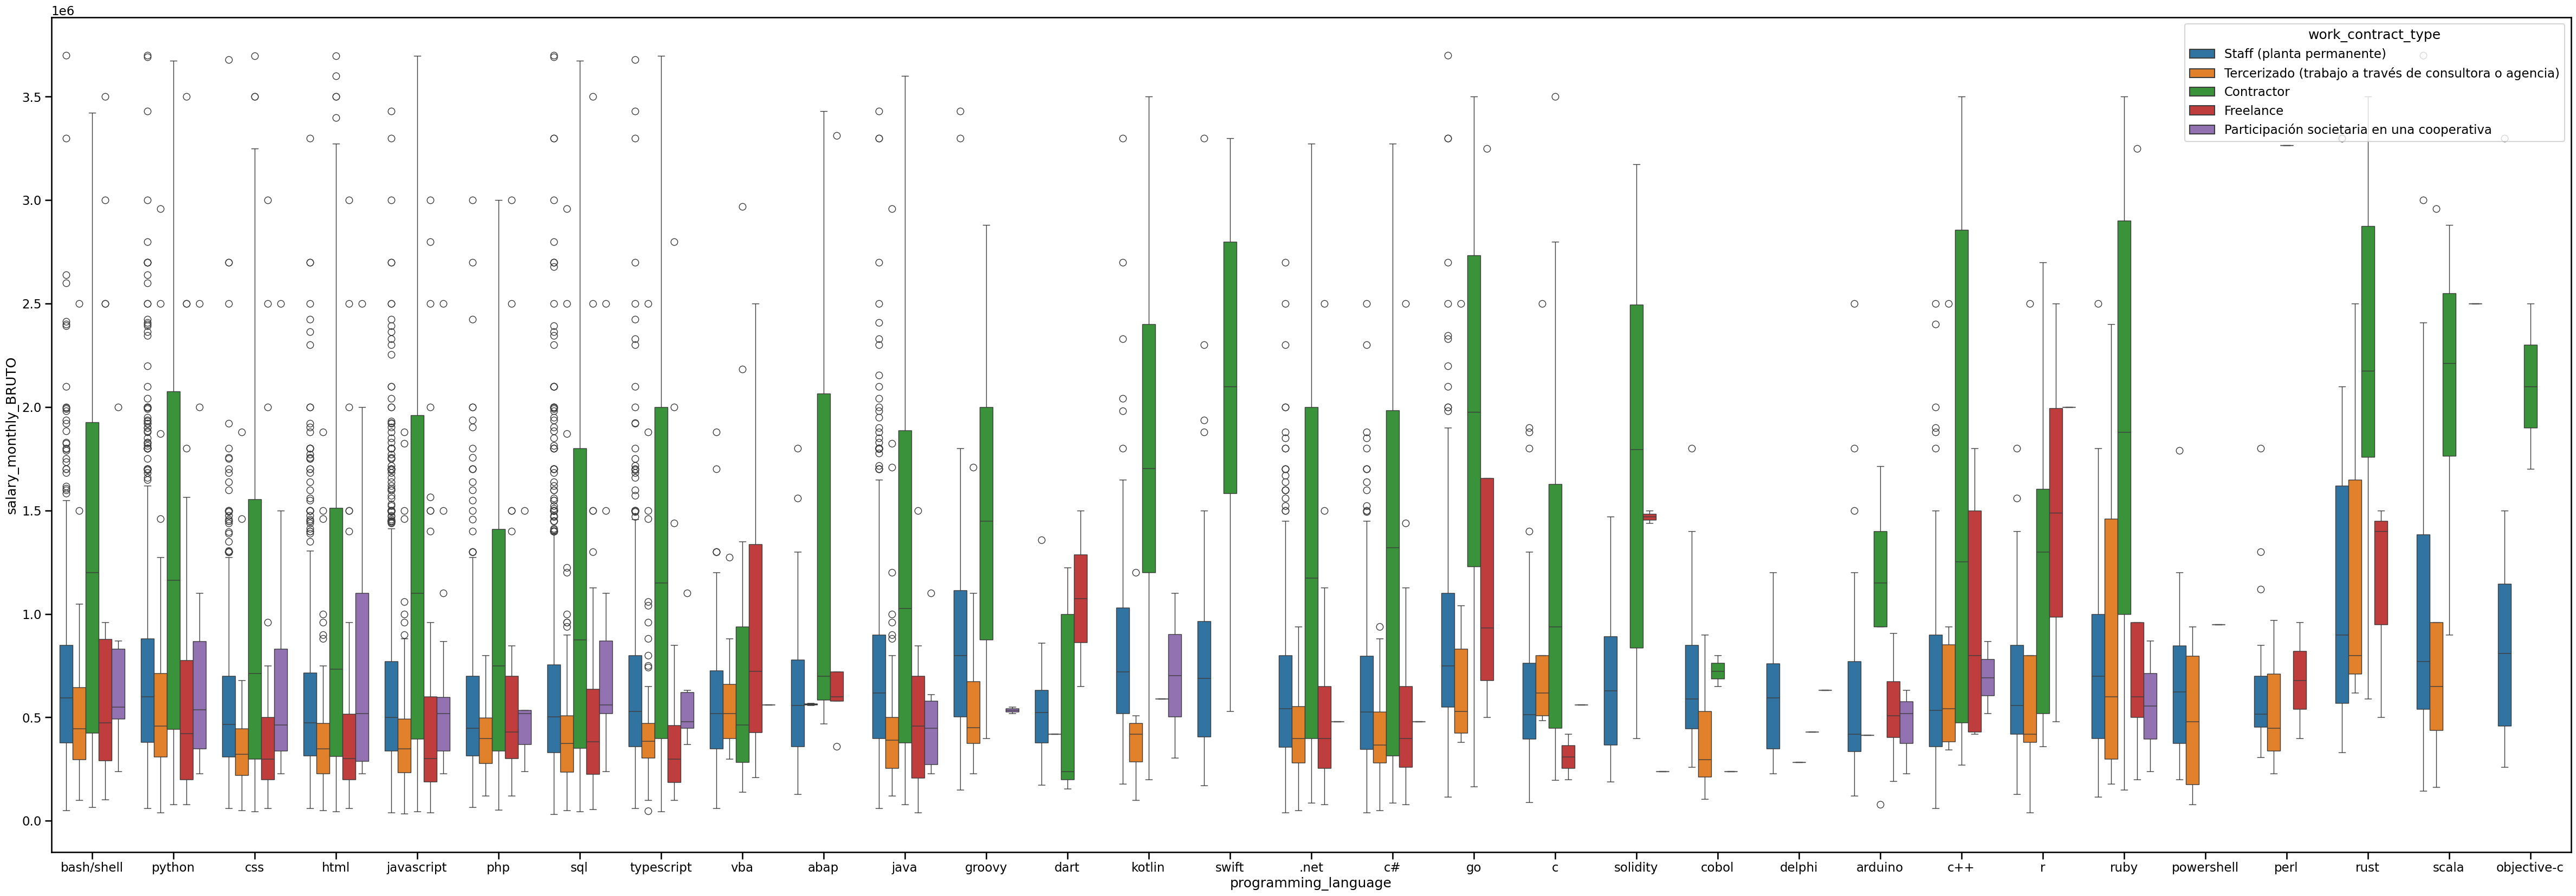

In [27]:
plt.figure(figsize=(60, 20))

seaborn.boxplot(data=filtered_df_lang,
                x='programming_language',
                y=bruto,
                hue=contrato);

El siguiente grafico nos permite observar el salario bruto en relacion a la modalidad de trabajo, las que pueden ser:
1. 100% remoto
2. 100% presencial
3. hibrido (presencial y remoto)

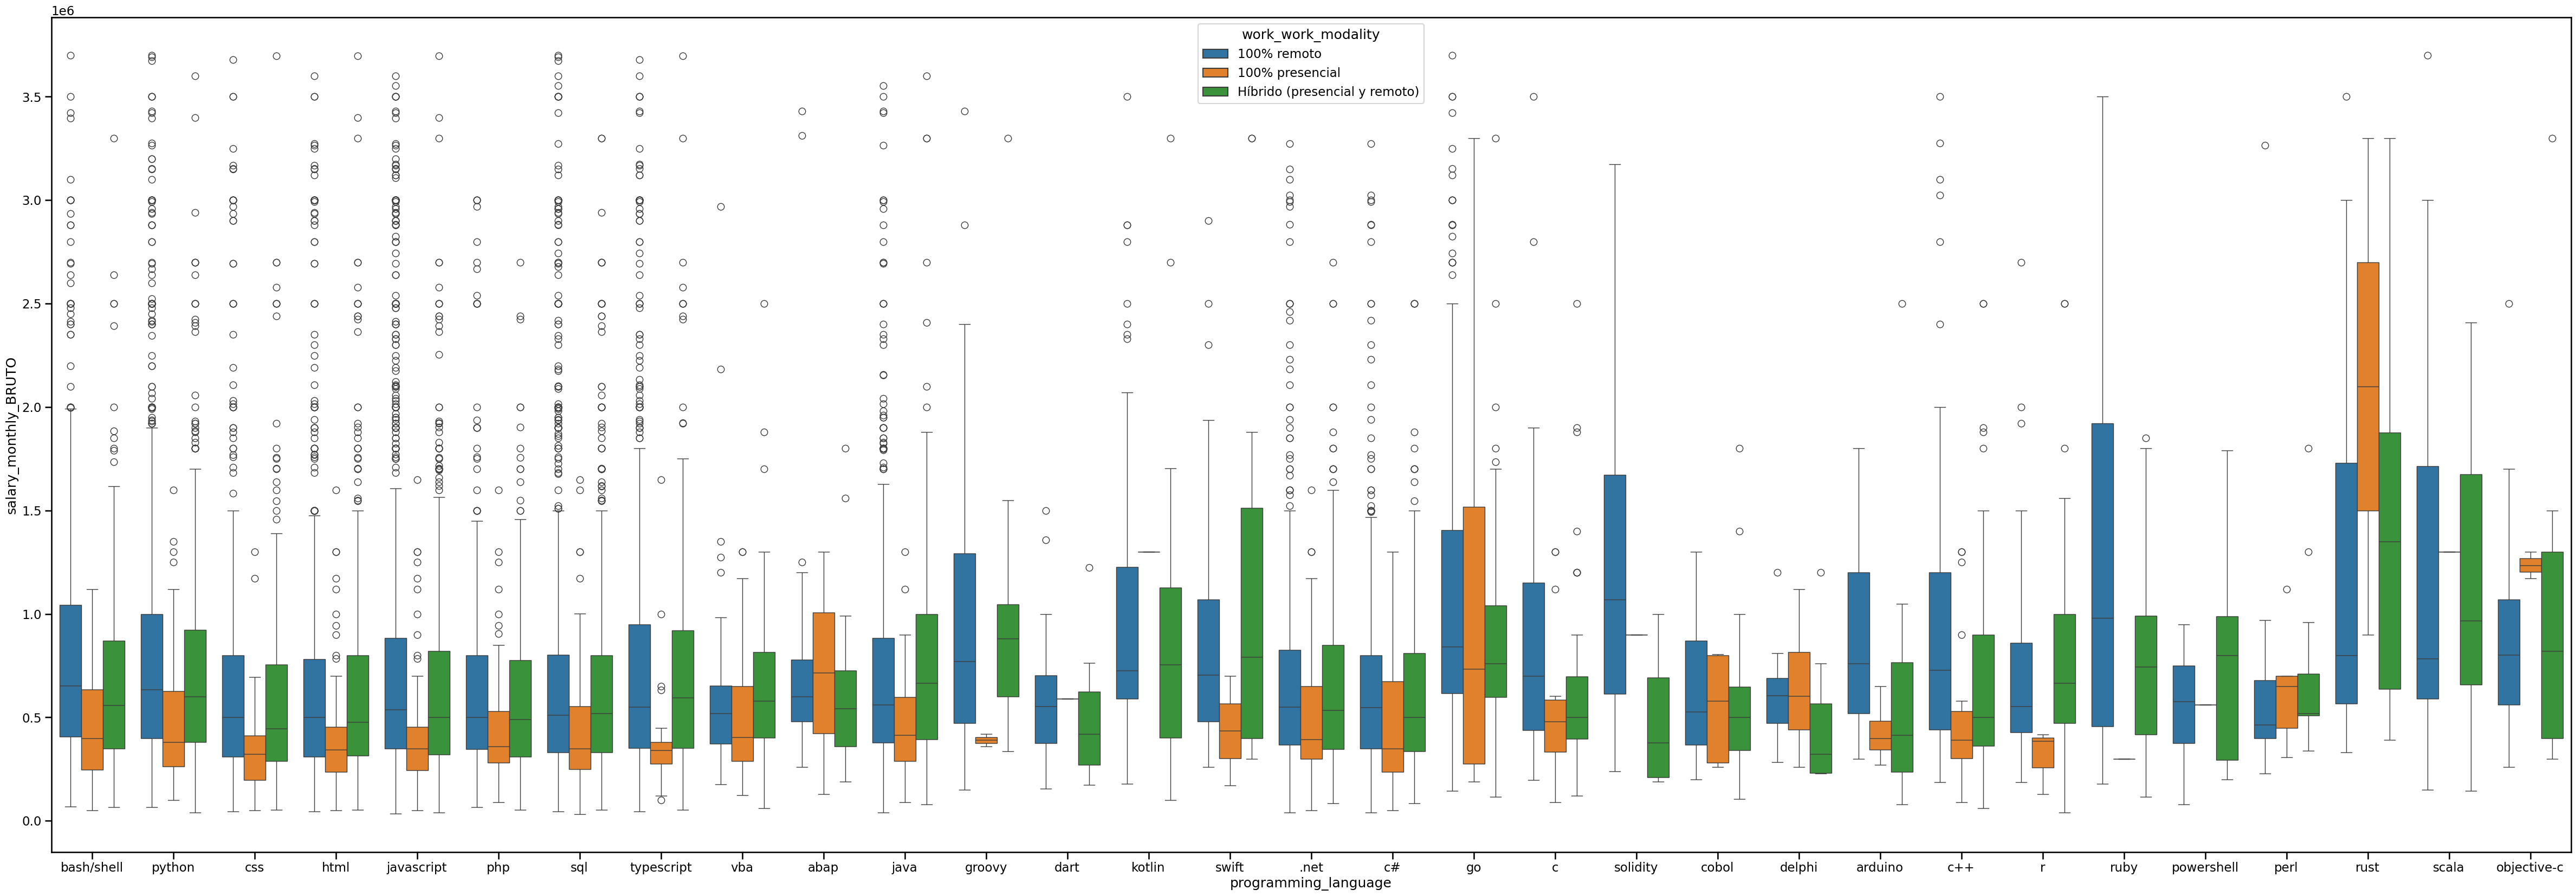

In [28]:
plt.figure(figsize=(60, 20))

seaborn.boxplot(data=filtered_df_lang,
                x='programming_language',
                y=bruto,
                hue= modalidad);

In [29]:
filtered_df_lang.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14814 entries, 0 to 5804
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   programming_language         14814 non-null  object 
 1   tools_programming_languages  14814 non-null  object 
 2   salary_monthly_NETO          14263 non-null  float64
 3   salary_monthly_BRUTO         14814 non-null  float64
 4   work_contract_type           14814 non-null  object 
 5   work_work_modality           14814 non-null  object 
 6   salary_in_usd                4992 non-null   object 
 7   cured_programming_languages  14814 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


El siguiente codigo examina el dataframe filtrado para los 31 lenguajes de programacion que seleccionamos y buscamos los siguientes valores estadisticos:
1. media
2. mediana
3. desviacion_std
4. Coeficiente de variacion 

In [30]:
selected_columns_top = filtered_df_lang.filter(items=['salary_monthly_BRUTO', 'programming_language'])
tmp = selected_columns_top.groupby(['programming_language']).mean().round(2).rename(columns={'salary_monthly_BRUTO': "media"})
tmp.loc[:, 'mediana'] = selected_columns_top.groupby(['programming_language']).median().round(2).salary_monthly_BRUTO
tmp.loc[:, 'desviacion_std'] = selected_columns_top.groupby(['programming_language']).std().round(2).salary_monthly_BRUTO
tmp.loc[:, 'coef_var'] = ((tmp["desviacion_std"]/tmp["media"])*100).apply(lambda s: '{0:.2f}'.format(s))
tmp['coef_var'] = pd.to_numeric(tmp['coef_var'])
tmp = tmp.sort_values(by='media', ascending=False)
tmp = tmp.reset_index()
tmp


,programming_language,media,mediana,desviacion_std,coef_var
0,rust,1430451.31,1100000.0,980986.59,68.58
1,scala,1191142.64,882006.5,871743.93,73.19
2,ruby,1103045.12,835000.0,908140.68,82.33
3,go,1081974.50,802500.0,751168.44,69.43
4,solidity,1069131.59,870000.0,853288.27,79.81
5,objective-c,1003374.88,825000.0,721670.66,71.92
6,kotlin,979387.64,750000.0,678956.42,69.32
7,swift,973558.19,706000.0,763693.58,78.44
8,groovy,935624.09,795000.0,617266.81,65.97
9,c++,804585.31,568000.0,658002.64,81.78


Vamos a realizar un analisis teniendo en cuenta la cantidad de programadores por lenguaje, la probabilidad de trabajar con ese lenguaje y como se ubicará el salario bruto respecto a la media general

In [31]:
# Cantidad de Programadores.
programmers = len(df)
# Media del salario BRUTO.
bruto_median = df[bruto].median()
print(f'Cantidad programadores: {programmers}')
print(f'La media del salario BRUTO = {bruto_median}')


Cantidad programadores: 5418
La media del salario BRUTO = 505000.0


El siguiente codigo lista la siguiente informacion:
1. Cantidad de programadores por lenguaje en la encuesta
2. Probabilidad de utilizar ese lenguaje
3. Probabilidad de ganar por arriba de la media

In [32]:
# ¿Cuáles de los lenguajes seleccionados ganan más que la mediana muestral?
salary_filter = filtered_df_lang[bruto] > bruto_median
for lang in interesting_languages:
    lang_filter = filtered_df_lang['programming_language'] == lang
    lang_programmers = len(filtered_df_lang[lang_filter])
    print(f'Cantidad programadores de {lang}: {lang_programmers}')
    p_lang = lang_programmers / programmers
    print(f'Probabilidad de utilizar {lang}: {p_lang}')

    lang_over_median = len(filtered_df_lang[lang_filter & salary_filter])
    p_lang_over_median = lang_over_median / lang_programmers
    print(f'Probabilidad BRUTO > Media con {lang}: {p_lang_over_median}')

    print('----------')

Cantidad programadores de sql: 2357
Probabilidad de utilizar sql: 0.435031376891842
Probabilidad BRUTO > Media con sql: 0.49257530759439966
----------
Cantidad programadores de javascript: 2126
Probabilidad de utilizar javascript: 0.3923957179771133
Probabilidad BRUTO > Media con javascript: 0.49717779868297274
----------
Cantidad programadores de html: 1522
Probabilidad de utilizar html: 0.2809154669619786
Probabilidad BRUTO > Media con html: 0.45137976346911957
----------
Cantidad programadores de python: 1519
Probabilidad de utilizar python: 0.28036175710594313
Probabilidad BRUTO > Media con python: 0.5951283739302172
----------
Cantidad programadores de java: 1022
Probabilidad de utilizar java: 0.18863049095607234
Probabilidad BRUTO > Media con java: 0.5743639921722113
----------
Cantidad programadores de css: 1018
Probabilidad de utilizar css: 0.1878922111480251
Probabilidad BRUTO > Media con css: 0.4361493123772102
----------
Cantidad programadores de typescript: 983
Probabilidad

**Conclusión**

Calculando la probabilidad condicional, parece que los mejores lenguajes (en términos del salario) 

- La probabilidad de ganar por encima de la media, dado que se utiliza *Rust* es de **0.86**.
- La probabilidad de ganar por encima de la media, dado que se utiliza *Go* es de **0.80**.
- La probabilidad de ganar por encima de la media, dado que se utiliza *Python* es de **0.59**.
- La probabilidad de ganar por encima de la media, dado que se utiliza *Javascript* es de **0.49**.
- La probabilidad de ganar por encima de la media, dado que se utiliza *R* es de **0.64**.

De los lenguajes seleccionados, *SQL* y *Javascript* son los más populares.
-   sql	
-	javascript
-	html
-	python	
-	java


------------------------------------------------------------------------------------------------------------------------------------------------------------- 

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica.
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


# RESPUESTA Ejercicio 2 - Densidades y varias variables

## Lectura del dataset

Volvemos a cargar los datos

En la notebook *00* se explican los detalles de la siguiente sección.

In [184]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
pd.options.display.max_columns=None
df = pd.read_csv(url)

In [185]:
df.head()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment,salary_percentage_inflation_adjustment,¿En qué mes fue el último ajuste?,salary_comparison_last_semester,¿Contás con beneficios adicionales?,salary_satisfaction,Trabajo de,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,company_employee_number,work_work_modality,Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?,company_recommended,"¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?",¿Salir o seguir contestando?,profile_studies_level,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,Uno,26.0,Abril,2,"Abono de Internet, Clases de idiomas, Crédito ...",2,Infosec,10.0,1.0,1.0,0,"Amazon Web Services, Linux","Bash/Shell, Python",Angular,Ninguna de las anteriores,Ninguna de las anteriores,De 201 a 500 personas,100% remoto,0,5,0,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,Dos,24.0,Mayo,2,Ninguna de las anteriores,3,DevOps Engineer,23.0,2.0,2.0,4,"Docker, Kubernetes, Linux, VMWare, Windows Server","Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...","Angular, Bootstrap, jQuery, Laravel, Node.js","MariaDB, Microsoft SQL Server, MongoDB, MySQL,...","PHPUnit, Postman",De 201 a 500 personas,100% presencial,0,4,1,Responder sobre mis estudios,Maestría,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,No,0.0,No tuve,3,"Abono de Internet, Capacitaciones y/o cursos,",3,Developer,0.0,0.0,0.0,0,Ninguna de las anteriores,"SQL, Oracle APEX, PL-SQL, SQL Developer",Ninguno de los anteriores,Oracle,Ninguna de las anteriores,De 11 a 50 personas,100% remoto,0,10,3,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis
3,Argentina,Chaco,Part-Time,Staff (planta permanente),190000.0,240000.0,NaN,NaN,No,No recibo bono,Dos,11.0,Mayo,1,"Capacitaciones y/o cursos, Descuento en gimnas...",2,Business Analyst,2.0,2.0,0.0,0,"Azure, SAP, CRM",ABAP,Ninguno de los anteriores,"Microsoft Azure (Tables, CosmosDB, SQL, etc)",Ninguna de las anteriores,De 501 a 1000 personas,Híbrido (presencial y remoto),1,7,3,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Mujer Cis
4,Argentina,Chaco,Full-Time,Tercerizado (trabajo a través de consultora o ...,250000.0,207000.0,NaN,NaN,No,No recibo bono,Dos,60.0,Mayo,1,Ninguna de las anteriores,1,QA / Tester,3.0,0.0,0.0,1,"Docker, Linux",Java,Lippia,Ninguna de las anteriores,"Appium, Cucumber, Lippia, Selenium",De 51 a 100 personas,100% remoto,0,7,2,Terminar encuesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Qué herramientas (prácticas y/o teóricas) son útiles para explorar la base, y descubrir patrones o asociaciones?**

**Respuesta**
-   Herramientas prácticas: 
    -   Visualización de datos a través de graficos generados por las librerias Seaborn y Matplotlib de Python.
-   Herramientas teóricas: 
    -   Estadística: Los métodos estadísticos tradicionales, como la media, la mediana, la desviación estándar y las pruebas de hipótesis, son esenciales para describir y analizar datos.
    -   Aprendizaje automático: Los algoritmos de aprendizaje automático, como la clasificación, el agrupamiento y la regresión, pueden usarse para identificar patrones complejos en datos no estructurados.



1. Seleccionar las columnas relevantes para analizar.

**Respuesta**

Dejando de lado los lenguajes de programación del ejercicio anterior, se procede a elegir las siguientes columnas
- Variables Numéricas: `salary_monthly_NETO`, `salary_monthly_BRUTO`, y `profile_age`.
- Variables Categóricas: `work_contract_type`, y `salary_in_usd`.
- Variables Ordinales: `profile_studies_level`, y `profile_studies_level_state` (también podría ser categórica).

2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

**Respuesta**

Como observamos en el Ejercicio 1, se toma como referencia la columna `salary_monthly_BRUTO` por  los siguientes motivos:
-   Presenta mas valores distintos de *NaN* que la columna `salary_monthly_NETO`.
-   Por otro lado el valor de `salary_monthly_NETO` esta sujeto a variables impositivas particulares para cada programador.

Observando los datos se pudo apreciar la existencia de valores *NaN* y erróneos, por lo que precedimos a eliminar los valores nulos y los menores a 30000 que existían en la columna `salary_monthly_BRUTO`.
Para los valores extremos superiores, se procedió a eliminar los mayores al percentil 99, entendiendo que esto generaba un sesgo en la media muestral.
En el caso de las columnas adicionales se procedió de la siguiente manera
- Se eliminan las filas con edades mayores a 100 años en `profile_age`, ya que carecen de sentido.
- Se aplica una transformación a los valores de `salary_in_usd`, para poder trabajar con valores *True/False* lugar de *strings*.

### 1. Selección de Columnas Relevantes

In [186]:
# Numéricas
neto = 'salary_monthly_NETO'
bruto = 'salary_monthly_BRUTO'
edad = 'profile_age'
experiencia = 'profile_years_experience'
# Categóricas
contrato = 'work_contract_type'
dolares = 'salary_in_usd'
# Ordinales
nivel = 'profile_studies_level'
estado = 'profile_studies_level_state'

# Selección de Columnas Relevantes.
relevant_columns = [neto, bruto, edad, experiencia, contrato, dolares, nivel, estado]

df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       '¿En qué mes fue el último ajuste?', 'salary_comparison_last_semester',
       '¿Contás con beneficios adicionales?', 'salary_satisfaction',
       'Trabajo de', 'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'tools_platform', 'tools_programming_languages', 'tools_frameworks',
       'tools_data_bases', 'tools_qa_testing', 'company_employee_number',
       'work_work_modality',
       'Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended',
       '¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?

### 2. Selección de Filas Relevantes

Usamos la misma funcion definida para el Ejercicio 1, en donde eliminamos las filas correspondientes a *Salario Bruto* por debajo de 20K ARG y los valores por arriba del percentil 99.5%

In [187]:
def info_salarios(df, salario):

    # ¿Cuántos NaN existen en la columna de salarios?
    print(f'Cantidad de salarios BRUTO nulos: {df[salario].isna().sum()}')

    # Definimos Salario Mínimo para la subpoblación de estudio.
    min_salary = 20000

    # ¿Cuántos salarios menores al salario minimo existen en la columna de salarios?
    print(f'Cantidad de salarios <= 20K: {(df[salario] <= min_salary).sum()}')
    
    # Considerando el salario mínimo. Filtramos el dataframe realizando el recorte de los valores inferiores
    df = df[df[salario] > min_salary]

    # Salario Máximo para la subpoblación de estudio (Percentil 99.5%).
    max_salary = df[salario].quantile(0.995)
    print(f'Percentil 99.5%: {max_salary}')

    # ¿Cuántos salarios son anómalos en la columna de salarios?
    print(f'Cantidad de salarios >= percentil 99.5%: {(df[salario] >= max_salary).sum()}')
    
    # Considerando el salario del percentil 99.5%, realizamos el recorte del dataframe de los valores superiores al percentil 99.5%
    df = df[df[salario] < max_salary]

    return df




**Información del salario NETO y BRUTO previa al filtrado**

In [188]:
print(df[[neto, bruto]].describe())

       salary_monthly_NETO  salary_monthly_BRUTO
count         5.566000e+03          5.805000e+03
mean          5.671732e+05          6.941626e+05
std           9.586431e+05          9.526238e+05
min           1.000000e+00          1.000000e+00
25%           2.500000e+05          2.971450e+05
50%           4.007285e+05          4.930000e+05
75%           6.000000e+05          8.000000e+05
max           4.500000e+07          4.500000e+07


**Información del salario NETO y BRUTO posterior al filtrado**

In [189]:
print('Filtrado registros de salario BRUTO:')
df = info_salarios(df, bruto)
print('----------')

# Datos Muestrales (sobre el salario NETO y el salario BRUTO).
print(df[[neto, bruto]].describe())

Filtrado registros de salario BRUTO:
Cantidad de salarios BRUTO nulos: 0
Cantidad de salarios <= 20K: 329
Percentil 99.5%: 4612375.0
Cantidad de salarios >= percentil 99.5%: 28
----------
       salary_monthly_NETO  salary_monthly_BRUTO
count         5.237000e+03          5.448000e+03
mean          5.712538e+05          6.981544e+05
std           7.001623e+05          6.168103e+05
min           1.390000e+02          2.300000e+04
25%           2.750000e+05          3.200000e+05
50%           4.160000e+05          5.072000e+05
75%           6.000000e+05          8.220000e+05
max           2.229600e+07          4.583000e+06


**Sobre el dataframe que estamos trabajando filtro los valores de edad superior a 100 años**

In [190]:
max_age = 100
# ¿Cuántas edades erróneas existen en la columna de edades?
print(f'Cantidad de edades >= 100: {(df[edad] >= max_age).sum()}')
# Filtro el dataframe
df = df[df[edad] < max_age]
print('----------')

# Datos Muestrales (sobre la edad).
print(df[edad].describe())

Cantidad de edades >= 100: 5
----------
count    5443.000000
mean       34.061914
std         8.231001
min        18.000000
25%        28.000000
50%        33.000000
75%        39.000000
max        99.000000
Name: profile_age, dtype: float64


**Se aplica una transformación a los valores de `salary_in_usd`, para poder trabajar con valores True/False lugar de strings**

In [191]:
df[dolares].unique()

array([nan, 'Cobro todo el salario en dólares',
       'Mi sueldo está dolarizado (pero cobro en moneda local)',
       'Cobro parte del salario en dólares'], dtype=object)

In [192]:
df[contrato].unique()

array(['Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Contractor', 'Freelance',
       'Participación societaria en una cooperativa'], dtype=object)

In [193]:
print(f'Posibles valores de VA: {df[dolares].unique()}')
# Por razones de comodidad, queremos trabajar con valores booleanos en esta columna.
df[dolares] = df[dolares].notna()
print(f'Posibles valores de VA: {df[dolares].unique()}')
print('----------')

# Datos Muestrales (sobre el salario en dólares).
print(df[dolares].describe())



Posibles valores de VA: [nan 'Cobro todo el salario en dólares'
 'Mi sueldo está dolarizado (pero cobro en moneda local)'
 'Cobro parte del salario en dólares']
Posibles valores de VA: [False  True]
----------
count      5443
unique        2
top       False
freq       3658
Name: salary_in_usd, dtype: object


In [194]:
df[contrato].unique()


array(['Staff (planta permanente)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Contractor', 'Freelance',
       'Participación societaria en una cooperativa'], dtype=object)

In [195]:

# Nos quedamos con las columnas que analizaremos.
df = df[relevant_columns]

print(f'Dimensiones del DF: {df.shape}')
df[:10]

Dimensiones del DF: (5443, 8)


,salary_monthly_NETO,salary_monthly_BRUTO,profile_age,profile_years_experience,work_contract_type,salary_in_usd,profile_studies_level,profile_studies_level_state
0,520000.0,680000.0,36,10.0,Staff (planta permanente),False,NaN,NaN
1,520000.0,650000.0,45,23.0,Staff (planta permanente),False,Maestría,Completo
2,104000.0,125000.0,29,0.0,Staff (planta permanente),False,NaN,NaN
3,240000.0,190000.0,23,2.0,Staff (planta permanente),False,NaN,NaN
4,207000.0,250000.0,32,3.0,Tercerizado (trabajo a través de consultora o ...,False,NaN,NaN
5,229000.0,276000.0,28,1.0,Staff (planta permanente),False,Universitario,Completo
6,250000.0,340000.0,28,2.0,Staff (planta permanente),False,NaN,NaN
7,312000.0,364000.0,34,11.0,Staff (planta permanente),False,Maestría,Completo
8,360000.0,509000.0,30,4.0,Staff (planta permanente),True,NaN,NaN
9,354000.0,426000.0,52,20.0,Staff (planta permanente),False,NaN,NaN


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5443 entries, 0 to 5804
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   salary_monthly_NETO          5233 non-null   float64
 1   salary_monthly_BRUTO         5443 non-null   float64
 2   profile_age                  5443 non-null   int64  
 3   profile_years_experience     5443 non-null   float64
 4   work_contract_type           5443 non-null   object 
 5   salary_in_usd                5443 non-null   bool   
 6   profile_studies_level        2468 non-null   object 
 7   profile_studies_level_state  2468 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(3)
memory usage: 345.5+ KB


## a) Densidad conjunta

¿Qué herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables **numéricas** y dos variables **categóricas**. Visualice la base según varias de las variables elegidas. ¿Puede describir de alguna forma el comportamiento de sus datos? ¿Qué herramientas utilizaría? Describa.

**Respuesta**

- Variables Numéricas: `salary_monthly_NETO`, `salary_monthly_BRUTO`, y `profile_age`.
- Variables Categóricas: `work_contract_type`, y `salary_in_usd`.

Para estudiar *variables categóricas* entre sí, se pueden utilizar **tablas de contingencia**; para estudiar las *variables numéricas* se pueden usar **gráficos de distribución conjunta**, observando en los distintos ejes las diferentes variables; y para estudiar *categóricas* y *numéricas*, *seaborn* nos da herramientas como los gráficos **pairplot** y **catplot**, con la posibilidad de utilizar distintos colores, tamaños, o formas para la representación de *variables categóricas*.

C:\Users\josez\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


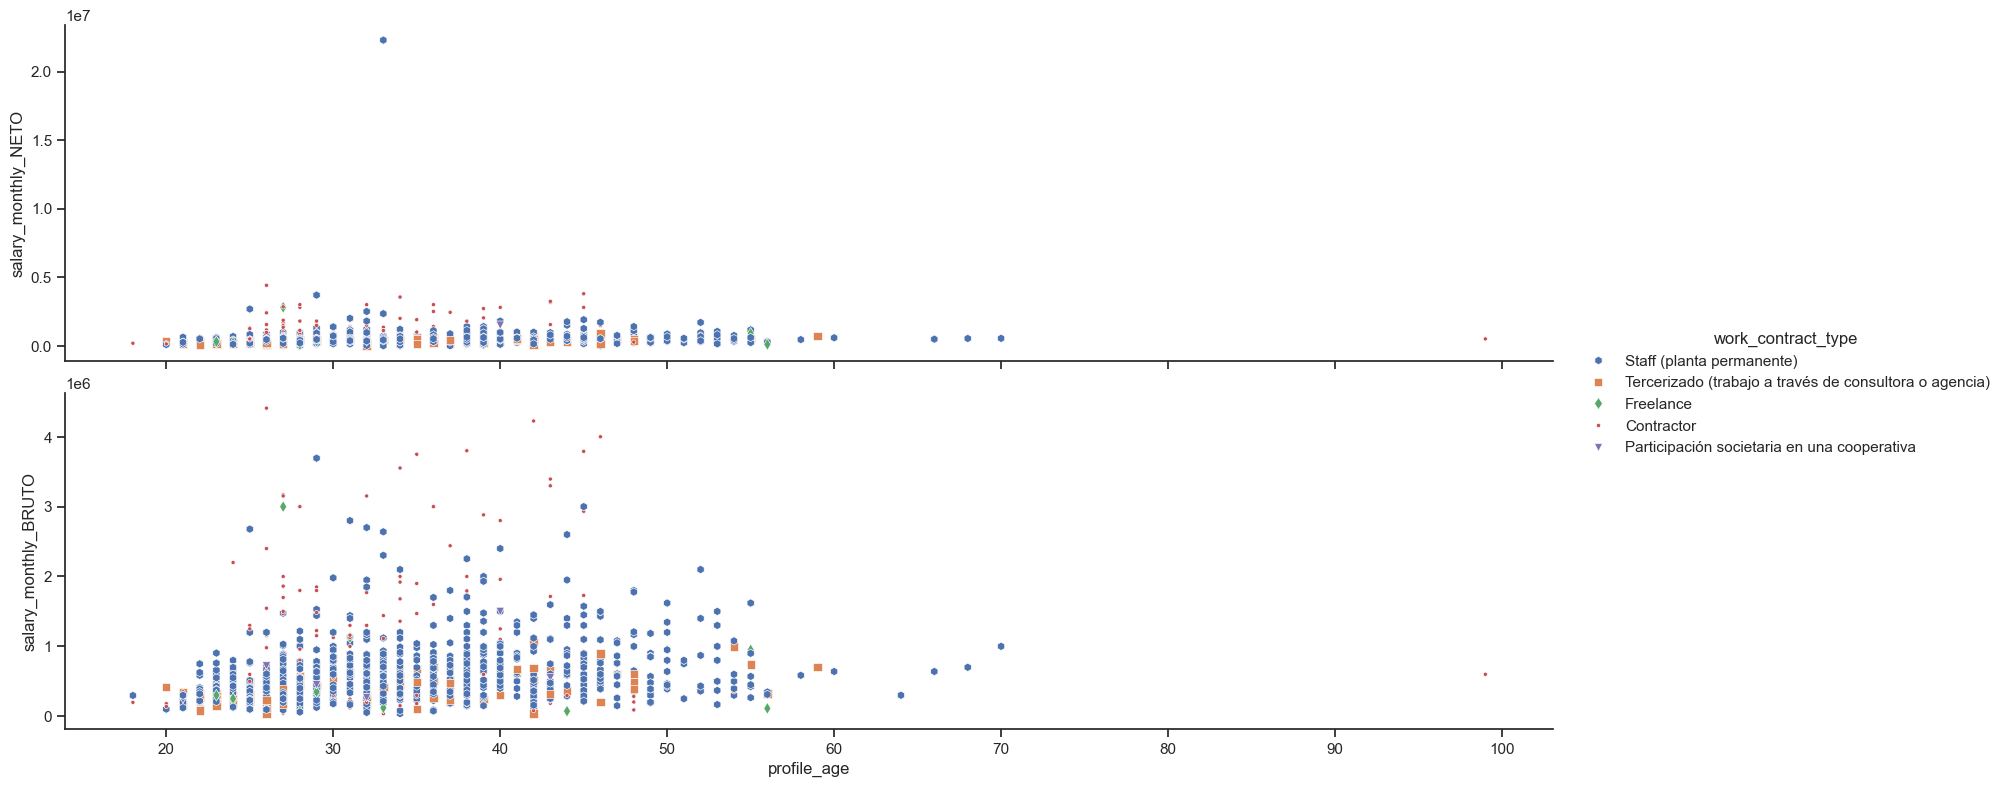

In [197]:
order = [ 'Staff (planta permanente)'
        , 'Tercerizado (trabajo a través de consultora o agencia)'
        , 'Freelance'
        , 'Contractor'
        , 'Participación societaria en una cooperativa'
        ]

# Para evitar superposición de puntos, solo se grafica una muestra de los datos.
seaborn.pairplot(data=df.sample(1000),
                 x_vars=edad,
                 y_vars=[neto, bruto],
                 hue=contrato,
                 hue_order=order,
                 markers=['.', 's', 'h', 'd', 'v'],
                 aspect=4, height=4);

C:\Users\josez\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


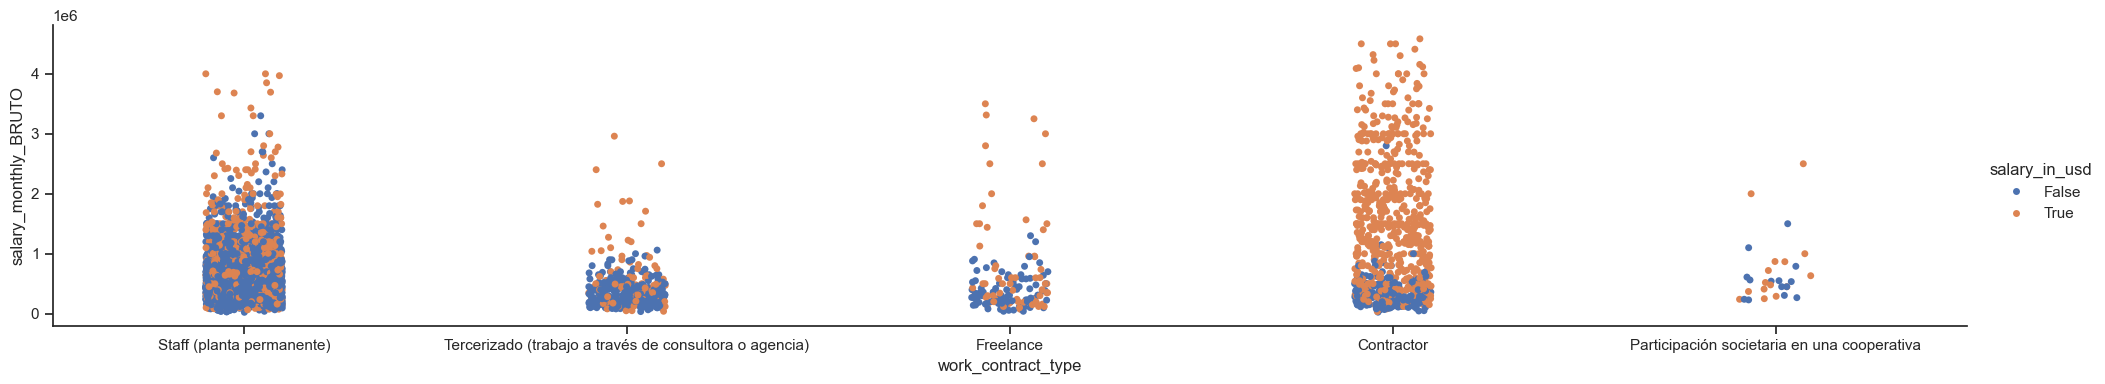

In [198]:
seaborn.catplot(data=df,
                x=contrato,
                y=bruto,
                hue=dolares,
                order=order,
                aspect=5, height=4);

C:\Users\josez\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


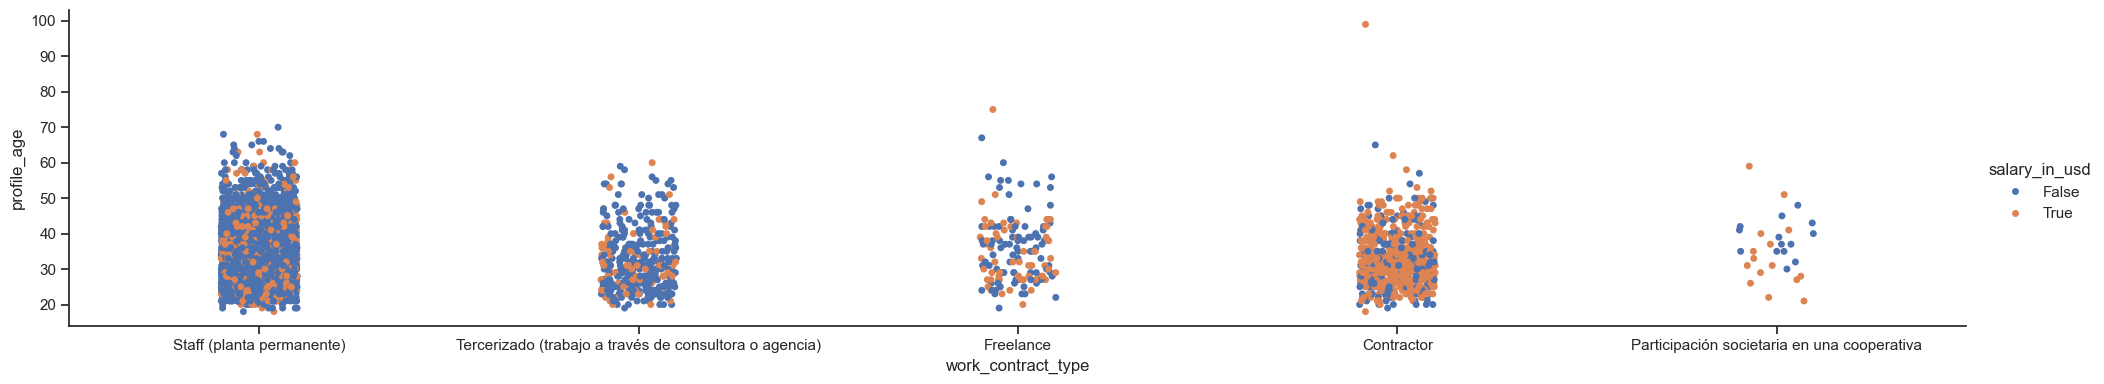

In [199]:
seaborn.catplot(data=df,
                x=contrato,
                y=edad,
                hue=dolares,
                order=order,
                aspect=5, height=4);

In [200]:
pd.crosstab(index=df[dolares],
            columns=df[contrato],
            normalize='columns',
            margins=True)[order + ['All']]

work_contract_type,Staff (planta permanente),Tercerizado (trabajo a través de consultora o agencia),Freelance,Contractor,Participación societaria en una cooperativa,All
salary_in_usd,,,,,,
False,0.740219,0.773067,0.577181,0.269693,0.482759,0.672056
True,0.259781,0.226933,0.422819,0.730307,0.517241,0.327944


**Respuesta**

Se puede observar, al analizar las variables de salarios con respecto a la edad y al tipo de contrato, que los contratos *Part-Time* parecieran estar asociados a personas más jovenes, además de a menores salarios.
También los contratos *Remoto* suelen poseer los salarios mayores.

Al estudiar el monto del salario, la moneda de pago, y el tipo de contrato, se observa que los trabajadores remotos con salarios en dólares son muchos más de los que tienen salarios no dolarizados. 
Pareciera también que los salarios dolarizados son superiores a los no dolarizados (conclusiones a las que se llegaron en el entregable 1), además se vuelve a observar que los trabajadores *Part-Time* tienen los menores salarios.

Analizando la *tabla de contingencia* se refuerza la idea de la dolarización del trabajo remoto, y analizando el resto de tipos de contrato, se observa una mayor dolarización en trabajadores *Freelance*.

## b) Asociación

Necesitamos decidir si sacar o no la columna de salario bruto, para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el salario neto? ¿Qué abordaje y medidas utilizaría?

C:\Users\josez\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


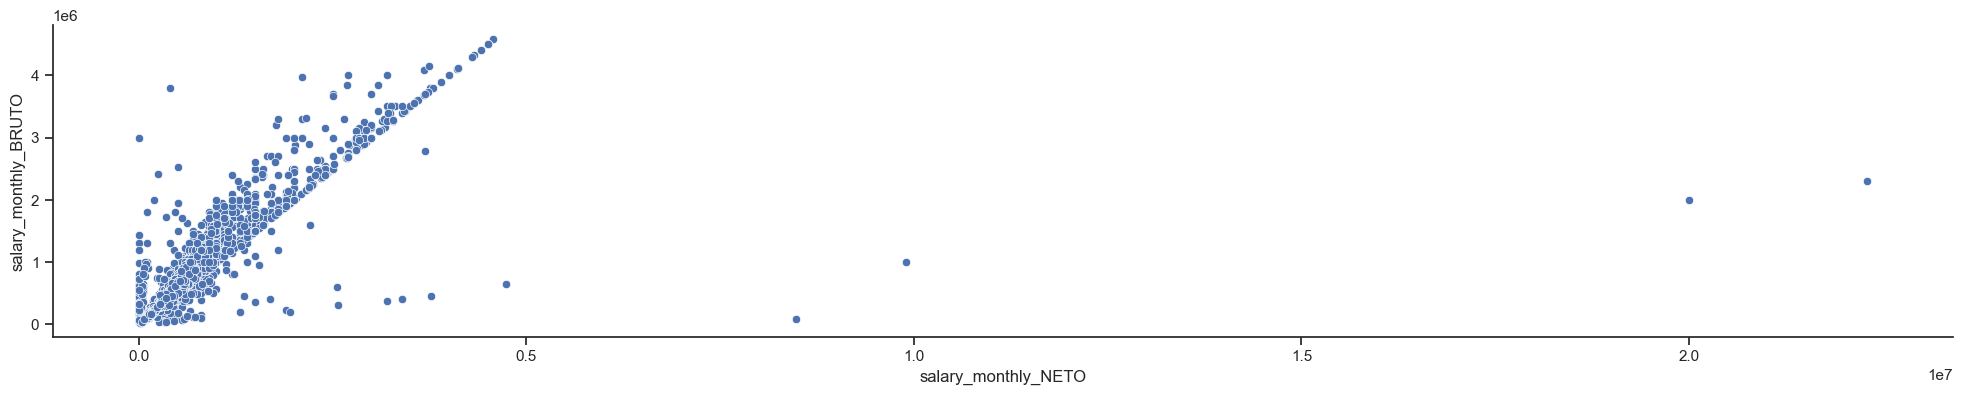

In [201]:
seaborn.pairplot(data=df,
                 x_vars=neto,
                 y_vars=bruto,
                 aspect=5, height=4);

In [202]:
# Calculo la correlación entre las columnas de salarios NETO y BRUTO.
df[[neto, bruto]].corr()

,salary_monthly_NETO,salary_monthly_BRUTO
salary_monthly_NETO,1.000000,0.747857
salary_monthly_BRUTO,0.747857,1.000000


**Respuesta**

El *pairplot* nos permite realizar de forma conjunta los gráficos de dispersión para todas las combinaciones de dos *features* sacados de un conjunto de *features* de interés.
En nuestro caso, solo nos interesan estudiar las variables aleatorias correspondientes a los salarios **bruto** y **neto**.
El gráfico nos permite obtener, entre otras cosas, una primera indicación de la *correlación* entre ambos features.
Se puede apreciar que la dispersión de los puntos se asemeja a la recta $x = y$ (se podría decir, al observar la dispersión, que existe una relación directa entre las variables $x$ e $y$).

Acompañando al gráfico, calculamos la **tabla de correlación** de ambas variables, obteniendo un valor muy cercano a uno.
Lo cual implica que existe una *correlación positiva* entre ambos *features*.

En definitiva, claramente hay una *correlación* entre ambas variables, por lo que **no** son independientes.
Por nuestro conocimiento sobre el tema, sabemos que en situaciones normales el salario neto de una persona debería ser equivalente al salario bruto descontado un cierto porcentaje, por lo que el resultado obtenido era esperable.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija **dos** subpoblaciones numerosas), y grafique de manera comparativa ambos histogramas de la variable `salary_monthly_NETO`.
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación.

In [203]:
df[nivel].unique()

array([nan, 'Maestría', 'Universitario', 'Terciario',
       'Posgrado/Especialización', 'Secundario', 'Doctorado',
       'Posdoctorado'], dtype=object)

In [210]:
sorted_studies_levels = [ 'Secundario'
                        , 'Terciario'
                        , 'Universitario'
                        , 'Posgrado/Especialización'
                        , 'Maestría'
                        , 'Doctorado'
                        , 'Posdoctorado'
                        ]

sorted_studies_state = [ 'En curso'
                       , 'Incompleto'
                       , 'Completado'
                       ]

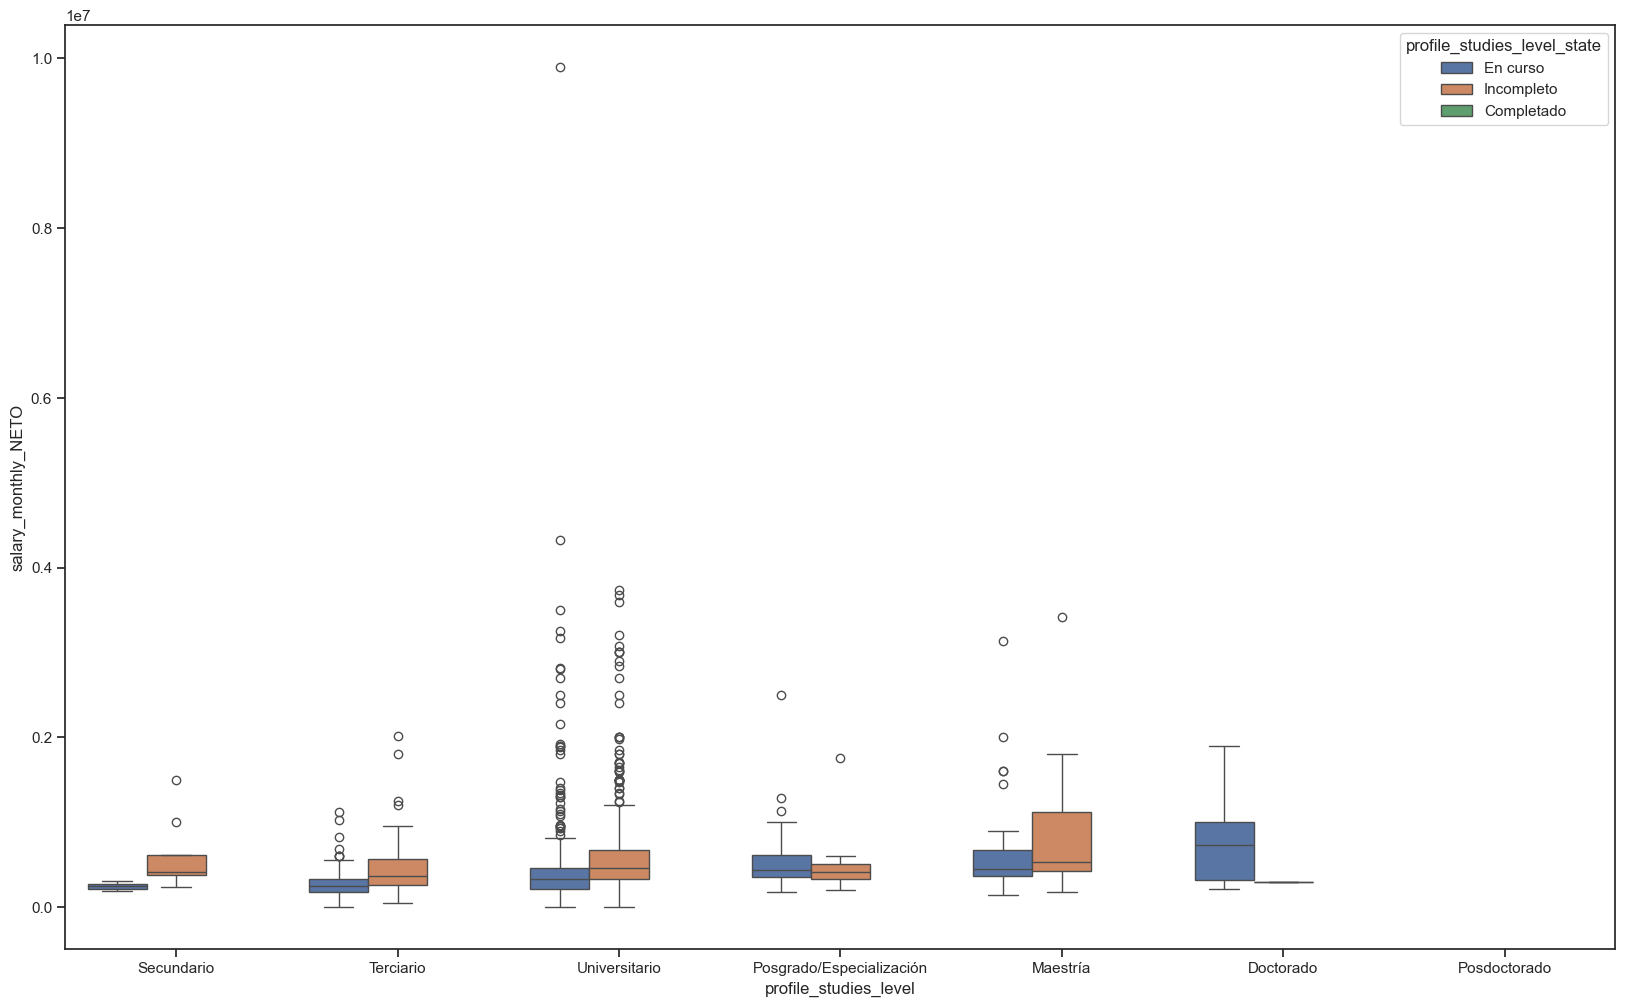

In [211]:
plt.figure(figsize=(20, 12))

seaborn.boxplot(data=df,
                x=nivel,
                y=neto,
                hue=estado,
                hue_order=sorted_studies_state,
                order=sorted_studies_levels);

In [212]:
# Averiguamos las subpoblaciones más numerosas.
df[nivel].value_counts()[sorted_studies_levels]

profile_studies_level
Secundario                   109
Terciario                    415
Universitario               1653
Posgrado/Especialización     146
Maestría                     110
Doctorado                     27
Posdoctorado                   8
Name: count, dtype: int64

In [214]:
new_groups = {
    'Secundario': 'Pre-Universidad',
    'Terciario': 'Pre-Universidad',
    'Universitario': 'Post-Universidad',
    'Posgrado': 'Post-Universidad',
    'Posgrado/Especialización': 'Post-Universidad',
    'Maestría': 'Post-Universidad',
    'Doctorado': 'Post-Universidad',
    'Posdoctorado': 'Post-Universidad'
}

sorted_studies_group = ['Pre-Universidad', 'Post-Universidad']

grupo = 'profile_studies_group'

df[grupo] = df[nivel].replace(new_groups)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5443 entries, 0 to 5804
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   salary_monthly_NETO          5233 non-null   float64
 1   salary_monthly_BRUTO         5443 non-null   float64
 2   profile_age                  5443 non-null   int64  
 3   profile_years_experience     5443 non-null   float64
 4   work_contract_type           5443 non-null   object 
 5   salary_in_usd                5443 non-null   bool   
 6   profile_studies_level        2468 non-null   object 
 7   profile_studies_level_state  2468 non-null   object 
 8   profile_studies_group        2468 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 388.0+ KB


In [216]:
df[grupo].unique()

array([nan, 'Post-Universidad', 'Pre-Universidad'], dtype=object)

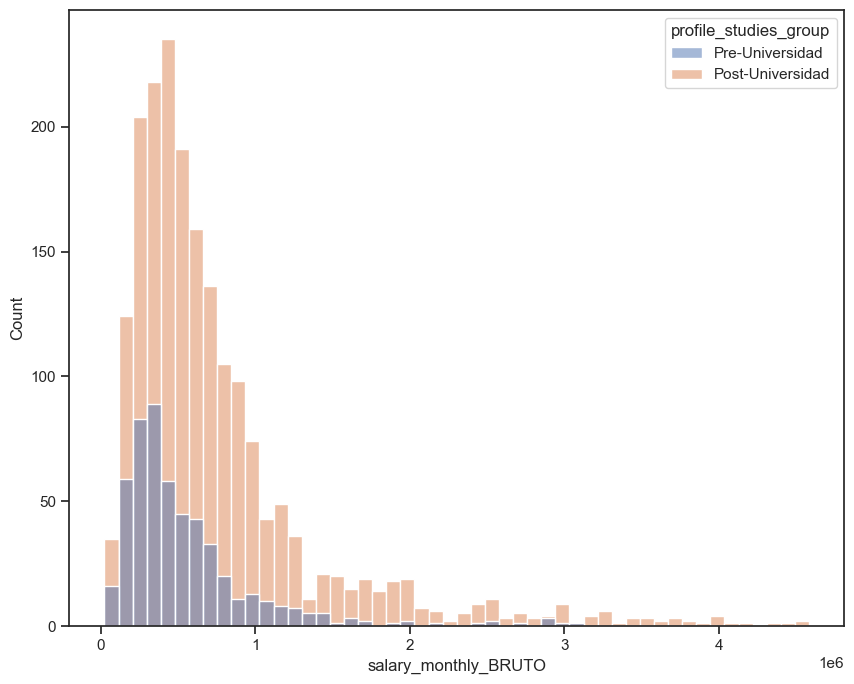

In [217]:
fig = plt.figure(figsize=(10, 8))

seaborn.histplot(df,
                 x=bruto,
                 hue=grupo,
                 hue_order=sorted_studies_group,
                 bins=50);

In [218]:
df_PreU = df[df[grupo] == 'Pre-Universidad']
df_PostU = df[df[grupo] == 'Post-Universidad']

In [219]:
print(df_PreU[neto].describe())
print('----------')
print(df_PostU[neto].describe())

count    5.000000e+02
mean     4.250708e+05
std      3.634086e+05
min      1.800000e+02
25%      2.300000e+05
50%      3.430000e+05
75%      5.000000e+05
max      2.932800e+06
Name: salary_monthly_NETO, dtype: float64
----------
count    1.865000e+03
mean     6.012825e+05
std      6.268916e+05
min      2.980000e+02
25%      2.913300e+05
50%      4.370000e+05
75%      6.400000e+05
max      9.900000e+06
Name: salary_monthly_NETO, dtype: float64


#### Grafico de frecuencias

Utilizamos el *gráfico de frecuencias* para obtener una mejor comparación entre ambos grupos, ya que hay más datos de *Post-Universidad* que de *Pre-Universidad*.

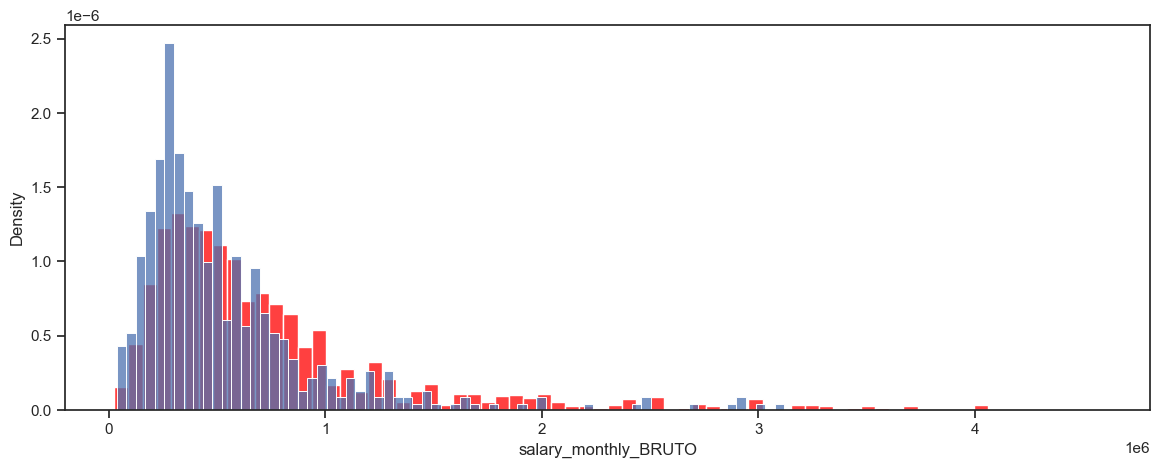

In [220]:
fig = plt.figure(figsize=(14, 5))

seaborn.histplot(df_PostU[bruto], stat="density", bins=70, color='red');
seaborn.histplot(df_PreU[bruto], stat="density", bins=70);

**Respuesta**

Al estudiar la gráfica con la comparativa de los *histogramas*, y las medidas de centralización y dispersión, pareciera que ambas variables (`salary_monthly_NETO` y `profile_studies_level`) **no** son independientes.
Se observa que la subpoblación de *Post-Universidad* obtiene mayores salarios, pero para aumentar nuestra certeza, se debería realizar un análisis sobre las probabilidades condicionales.

In [221]:
mean_salary = df[bruto].mean()
print(f'Salario BRUTO Medio: {mean_salary}')

print('----------')

# Probabilidad de cobrar más que el salario promedio.
p_salary_over_mean = len(df[df[bruto] > mean_salary]) / len(df)
print(f'P(BRUTO > Medio) = {p_salary_over_mean}')

# Probabilidad de cobrar más que el salario promedio (siendo PreU).
preU = len(df_PreU)
preU_over_mean = len(df_PreU[df_PreU[bruto] > mean_salary])
p_preU_over_mean = preU_over_mean / preU
print(f'P(BRUTO > Medio | Pre-Universidad) = {p_preU_over_mean}')

# Probabilidad de cobrar más que el salario promedio (siendo PostU).
postU = len(df_PostU)
postU_over_mean = len(df_PostU[df_PostU[bruto] > mean_salary])
p_postU_over_mean = postU_over_mean / postU
print(f'P(BRUTO > Medio | Post-Universidad) = {p_postU_over_mean}')

Salario BRUTO Medio: 698505.4282436157
----------
P(BRUTO > Medio) = 0.33951864780451957
P(BRUTO > Medio | Pre-Universidad) = 0.22328244274809161
P(BRUTO > Medio | Post-Universidad) = 0.3775720164609053


**Respuesta**

Con los resultados obtenidos llegamos a la conclusión que el nivel de estudio alcanzado (`profile_studies_level`) y el salario (`salary_monthly_NETO`) **no** son variables independientes.

- La probabilidad de ganar por encima del promedio, dado que se alcanzó la universidad es de **0.44**.
- La probabilidad de ganar por encima del promedio, dado que **no** se alcanzó la universidad es de **0.30**.

## d) Densidad conjunta condicional

Elija dos variables **numéricas** y una variable **categórica**.
Estudie la dispersión (*scatterplot*) de las dos variables numéricas, discriminando en color por la variable categórica (**hue** en *seaborn*).

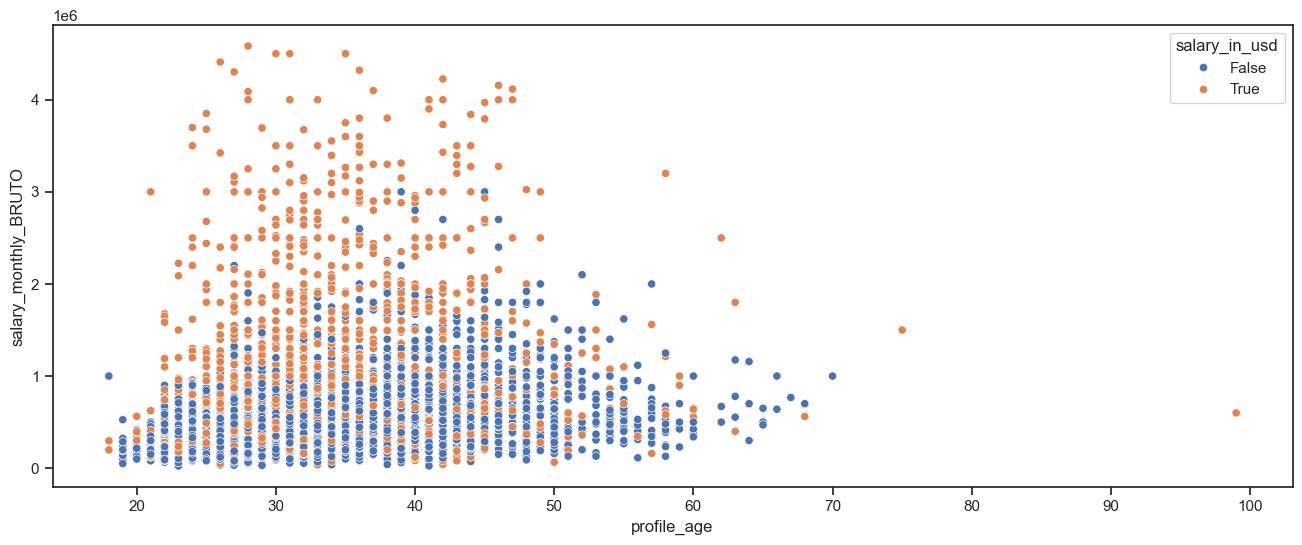

In [222]:
plt.figure(figsize=(16, 6))

seaborn.scatterplot(data=df,
                    x=edad,
                    y=bruto,
                    hue=dolares);

*Respuesta**

- Variables Numéricas: `salary_monthly_NETO`, y `profile_age`.
- Variable Categórica: `salary_in_usd`.

El *scatterplot* muestra la relación entre dos variables numéricas continuas (`salary_monthly_NETO` y `profile_age`), donde se utiliza el color para distinguir una variable categórica adicional (`salary_in_usd`).

Es importante mencionar que la cantidad de salarios en pesos, en nuestra muestra, es mucho mayor a la cantidad de salarios en dólares.
Por lo que se observa que los puntos correspondientes a salarios en pesos se amontonan.

En el gráfico es posible notar un patrón que ya hemos mencionado anteriormente.
Los salarios más altos están, en su mayoría, dolarizados.
A simple vista existe una separación próxima a los **150000** pesos, donde la mayoría de los puntos celestes se encuentran por debajo, mientras que la mayoría de los puntos amarillos se encuentran por encima.

También se podría notar que los jóvenes (entre 18 y 22 años) parecen ser los que menos cobran.
Quizás por su falta de experiencia laboral (análisis que ya realizamos en clases pasadas).

Por último, no parece que exista algún otro tipo de relación (o dependencia) entre el salario de un programador y su edad.
Al menos no es posible hacer una conjetura contando solo con este único gráfico.

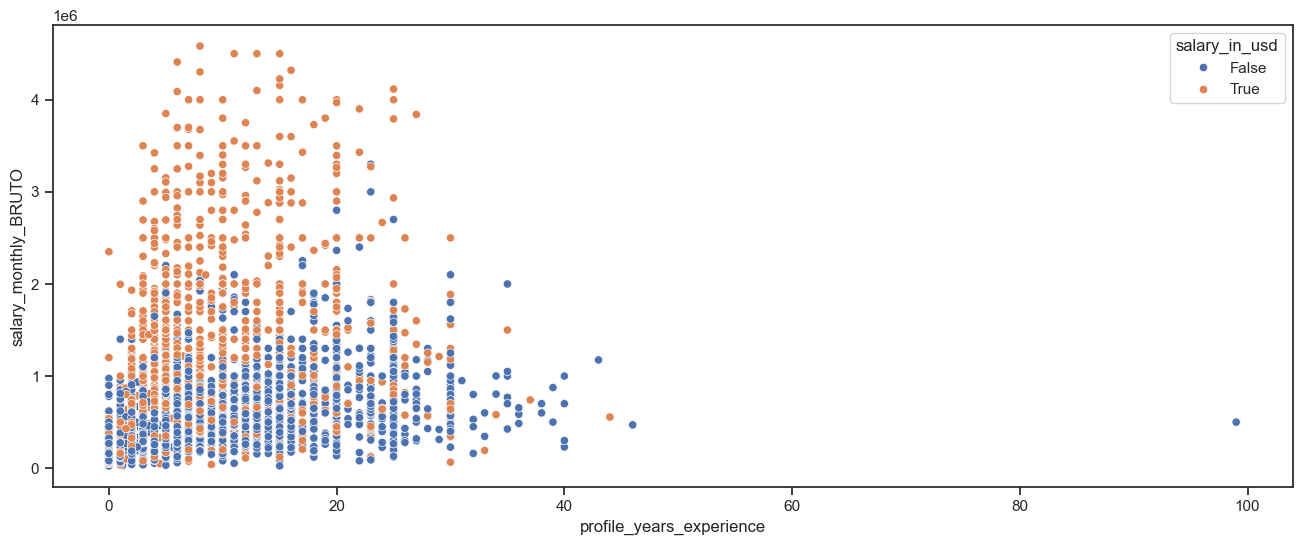

In [228]:
plt.figure(figsize=(16, 6))

seaborn.scatterplot(data=df,
                    x=experiencia,
                    y=bruto,
                    hue=dolares);

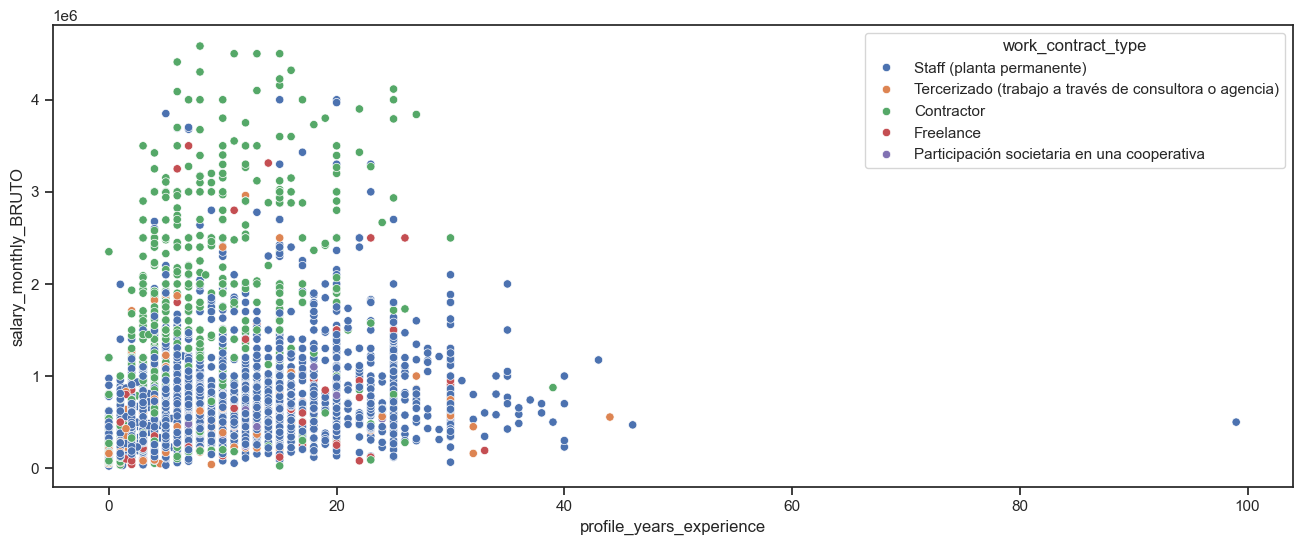

In [230]:
plt.figure(figsize=(16, 6))

seaborn.scatterplot(data=df,
                    x=experiencia,
                    y=bruto,
                    hue=contrato);

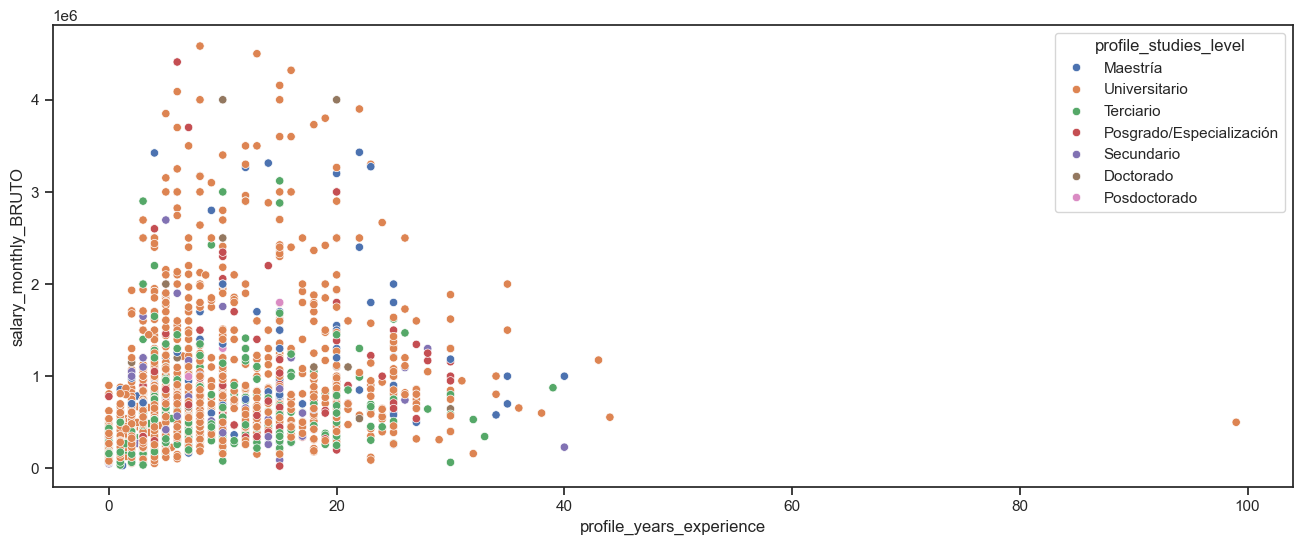

In [231]:
plt.figure(figsize=(16, 6))

seaborn.scatterplot(data=df,
                    x=experiencia,
                    y=bruto,
                    hue=nivel);